Assume that all properties of a paper apply to all of its datasets. Some are obvious:
- researcher location
- time

some not so much:
- langauge
- target

TODO: double-check for some cases where there are more than 2 datasets, if the languages and targets can be applied to all new datasets

exception: cases where there are multiple languages like (id = 20) 'xhate-999: Analyzing and Detecting Abusive Language Across Domains and Languages'

We have translated the 999 test instances from the English (EN) XHATE-999 to five target languages: Albanian (SQ), Croatian (HR), German (DE), Russian (RU), and Turkish (TR).

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

In [300]:
sns.set_context('paper')
# sns.set_style("whitegrid")
sns.set_style("darkgrid")

from matplotlib import cm
cm_name = 'Dark2'
cm_ = cm.get_cmap(cm_name)

In [301]:
#! pip install cmasher

In [302]:
import cmasher as cmr

colors = cmr.take_cmap_colors(cm_name, 5, return_fmt='hex')

In [303]:
#!pip install openpyxl

In [304]:
data = pd.read_csv('DehumReview_1.csv')

In [305]:
data.columns

Index(['Unnamed: 0', 'id', 'repeat check', 'reference', 'Title of the paper',
       'Journal', 'Researcher location', 'Summary of the Paper', 'reaffirm',
       'citations', 'Publication date', 'Fill-in date', 'Accessibility',
       'Filter dataset', 'Construct definition', 'Sub-category',
       'Sub-category_1_TEXT', 'availability of data', 'format of dataset',
       'format of dataset_3_TEXT', 'how to access',
       'verification of the way to access', 'reference of dataset',
       'Number of datasets in use', 'Number of new datasets', 'Data source',
       'topical focus', 'Language', 'Time span of data collection',
       'data production', 'Country/ region span', 'Events',
       'Data collection procedure\n', 'anonymity of data',
       'anonymity data_1_TEXT', 'Annotated type', 'annotation schema',
       'schema', 'Sampling available', 'sampling strategy',
       'annotation number', 'train', 'test', 'Annotators', 'guideline1',
       'Guidelines', 'Incentives 1', 'Incent

In [306]:
data[['Identity-directed', 'Identity-directed_1_TEXT',
       'Affiliation-directed', 'Affiliation-directed_1_TEXT',
       'Person-directed', 'Person-directed_1_TEXT', 'about or to a person']]

,Identity-directed,Identity-directed_1_TEXT,Affiliation-directed,Affiliation-directed_1_TEXT,Person-directed,Person-directed_1_TEXT,about or to a person
0,Yes,"Extremism, Religion, Political",No,NaN,No,NaN,NaN
1,Yes,"Race, Ethnicity, National origin",No,NaN,No,NaN,NaN
2,Yes,"Race, Gender, Class, Nationality, Religion, Age, Sexuality, Body, Disability",No,NaN,No,NaN,NaN
3,No,NaN,No,NaN,No,NaN,NaN
4,No,NaN,No,NaN,No,NaN,NaN
...,...,...,...,...,...,...,...
336,No,NaN,No,NaN,No,NaN,NaN
337,No,NaN,No,NaN,No,NaN,NaN
338,No,NaN,No,NaN,No,NaN,NaN
339,Yes,"Sexism, Racism",No,NaN,No,NaN,NaN


In [307]:
len(data)

341

In [308]:
data[['Construct definition', 'Sub-category', 'Sub-category_1_TEXT', 'General or specific']].isna().sum() / len(data)

Construct definition    0.000000
Sub-category            0.000000
Sub-category_1_TEXT     0.480938
General or specific     0.000000
dtype: float64

**Construct definition:** Indicate how does the paper define the topical focus? (e.g., sexism, racism, etc.) If the paper uses a quote from prior study, you can copy the content. Otherwise, it should be the original text the researchers have used in the paper to define the topical focus.


**Sub-category:** Indicate if a particular strategy has been introduced to distinguish the negative or positive class of the construct


**Sub-category:** Indicate if a particular strategy has been introduced to distinguish the negative or positive class of the construct? - Yes - Text

**General or specific:** If the paper studies content that expresses negativity in a general manner or against targets from a specific community.

In [309]:
data = data[1:]

<AxesSubplot:xlabel='Sub-category'>

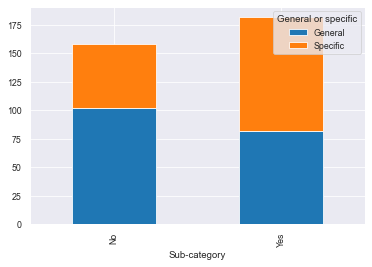

In [310]:
data.groupby(['Sub-category', 'General or specific']).size().unstack().plot(kind = 'bar', stacked = True)

In [311]:
data.columns

Index(['Unnamed: 0', 'id', 'repeat check', 'reference', 'Title of the paper',
       'Journal', 'Researcher location', 'Summary of the Paper', 'reaffirm',
       'citations', 'Publication date', 'Fill-in date', 'Accessibility',
       'Filter dataset', 'Construct definition', 'Sub-category',
       'Sub-category_1_TEXT', 'availability of data', 'format of dataset',
       'format of dataset_3_TEXT', 'how to access',
       'verification of the way to access', 'reference of dataset',
       'Number of datasets in use', 'Number of new datasets', 'Data source',
       'topical focus', 'Language', 'Time span of data collection',
       'data production', 'Country/ region span', 'Events',
       'Data collection procedure\n', 'anonymity of data',
       'anonymity data_1_TEXT', 'Annotated type', 'annotation schema',
       'schema', 'Sampling available', 'sampling strategy',
       'annotation number', 'train', 'test', 'Annotators', 'guideline1',
       'Guidelines', 'Incentives 1', 'Incent

In [312]:
len(data)

340

In [313]:
# how to go from 503 to 343? reaffirm = yes, accessibility yes, filter_data yes 

In [314]:
# data = pd.read_csv('../data/DehumReview_1.csv')
filename = 'DehumReview_1.csv'
# filename = 'DehumReview_1_old.csv'
# filename = 'Dehum Review_cleaned_v10.csv'
# filename = 'DehumReview_indira_language.csv'
data = pd.read_csv(filename, encoding = "ISO-8859-1")

data.head()

,Unnamed: 0,id,repeat check,reference,Title of the paper,Journal,Researcher location,Summary of the Paper,reaffirm,citations,...,Identity-directed,Identity-directed_1_TEXT,Identity-directed_summary,Affiliation-directed,Affiliation-directed_1_TEXT,Person-directed,Person-directed_1_TEXT,about or to a person,counter speech,Content producer
0,0,1.0,No,"(Aldera et al., 2021)",Exploratory Data Analysis and Classification of a New Arabic Online Extremism Dataset,IEEE Access,Saudi Arabia,"In this paper, the authors present a dataset compiled for this purpose and discuss the classification methods that can be used for extremism detection. The manually annotated Arabic Twitter dataset consists of 89,816 tweets published between 2011 and 2021. Using guidelines, three expert annotators labelled the tweets as extremist or non-extremist. Exploratory data analysis was performed to understand the datasetâs features. Classification algorithms were used with the dataset, including logistic regression, support vector machine, multinominal naÃ¯ve Bayes, random forest, and BERT. Among the traditional machine learning models, support vector machine with term frequency-inverse document frequency features achieved the highest accuracy (0.9729). However, BERT outperformed the traditional models with an accuracy of 0.9749. The dataset is publicly available at https://dx.doi.org/ 10.21227/g9c0-1t21.",Yes,1.0,...,Yes,"Extremism, Religion, Political","Religion, Political, Other",No,NaN,No,NaN,NaN,No,Human
1,1,2.0,No,"(Relia et al., 2019)","Race, Ethnicity and National Origin-Based Discrimination in Social Media and Hate Crimes across 100 U.S. Cities",In Proceedings of the International AAAI Conference on Web and Social Media,USA,"The paper studies malicious online content of hate speech, specifically related to race, ethnicity and national-origin based discrimination in social media, alongside hate crimes motivated by those characteristics in 100 cities across the United States. The paper developed a spatially-diverse dataset and classification pipeline to study targeted and self-narration of discrimination on social media. The paper investigates the association between the proportion of targeted discrimination and the number of hate crimes. Also, the authors study linguistic features of discrimination Tweets in relation to hate crimes by city.",Yes,47.0,...,Yes,"Race, Ethnicity, National origin","Race, Nationality",No,NaN,No,NaN,NaN,No,Human
2,2,4.0,No,"(Nangia et al., 2020)",CrowS-Pairs: A Challenge Dataset for Measuring Social Biases in Masked Language Models,arXiv preprint,USA,"To measure some forms of social bias in language models against protected demographic groups in the US, the authors introduce the Crowdsourced Stereotype Pairs benchmark (CrowS-Pairs). CrowS-Pairs has 1508 examples that cover stereotypes dealing with nine types of bias, like race, religion, and age. In CrowS-Pairs a model is presented with two sentences: one that is more stereotyping and another that is less stereotyping. The data focuses on stereotypes about historically disadvantaged groups and contrasts them with advantaged groups. They find that all three of the widelyused MLMs they evaluate substantially favor sentences that express stereotypes in every category in CrowS-Pairs.",Yes,98.0,...,Yes,"Race, Gender, Class, Nationality, Religion, Age, Sexuality, Body, Disability","race, gender, class, nationality, religion, age, sexuality, body, disability",No,NaN,No,NaN,NaN,Yes,Human
3,3,5.0,No,"(Iqbal, Chun and Keshtkar, 2020)",Using Computational Linguistics to Extract Semantic Patterns from Trolling Data,2020 IEEE 14th International Conference on Semantic Computing (ICSC),USA,"The goal of this study is to use state-of-the-art word embedding, computational linguistics, and semantic sentiment extraction techniques to find patterns for the trolling contents. To do so, the authors applied word embedding to explore patterns in the tweet context. They also apply part of speech ex

In [315]:
len(data)

341

In [316]:
data.columns

Index(['Unnamed: 0', 'id', 'repeat check', 'reference', 'Title of the paper',
       'Journal', 'Researcher location', 'Summary of the Paper', 'reaffirm',
       'citations', 'Publication date', 'Fill-in date', 'Accessibility',
       'Filter dataset', 'Construct definition', 'Sub-category',
       'Sub-category_1_TEXT', 'availability of data', 'format of dataset',
       'format of dataset_3_TEXT', 'how to access',
       'verification of the way to access', 'reference of dataset',
       'Number of datasets in use', 'Number of new datasets', 'Data source',
       'topical focus', 'Language', 'Time span of data collection',
       'data production', 'Country/ region span', 'Events',
       'Data collection procedure\n', 'anonymity of data',
       'anonymity data_1_TEXT', 'Annotated type', 'annotation schema',
       'schema', 'Sampling available', 'sampling strategy',
       'annotation number', 'train', 'test', 'Annotators', 'guideline1',
       'Guidelines', 'Incentives 1', 'Incent

In [317]:
data['Reported'].isna().sum()

184

In [318]:
data['Conceptualization'].isna().sum()

173

### minor data clean up/correction

TODO: change this based on the ids and not row numbers

In [319]:
data[data['id'] == 72][['Title of the paper', 'Language']]

,Title of the paper,Language
47,Offensive Language and Hate Speech Detection for Danish,"Danish, English"


In [320]:
data.at[47, 'Language'] = 'Danish, English'
data.iloc[47]['Language']

'Danish, English'

In [321]:
data_reported = data[~data['Reported'].isna()]
data_reported[data_reported['Reported'].str.contains('race,nationality')][['id', 'Reported']]

,id,Reported


In [322]:
data.at[285, 'Reported'] = 'religion, race, nationality, class, political, organization/institution, other'
data.iloc[285]['Reported']

'religion, race, nationality, class, political, organization/institution, other'

In [323]:
for _, row in data_reported.iterrows():
    if 'race.' in row['Reported'].lower():
        print(row[['id', 'Reported']])

In [324]:
data.at[234, 'Reported'] = 'gender, disability, race'
data.iloc[234]['Reported']

'gender, disability, race'

In [325]:
data_reported[data_reported['Reported'].str.contains('disabilities')][['id', 'Reported']]

,id,Reported


In [326]:
data.at[77, 'Reported'] = 'race, gender, sexuality, religion, age, body, disability, class, Political, other'
data.at[176, 'Reported'] = 'race, gender, political, religion, disability, other'

In [327]:
# drop my paper because it was wrongly included

In [328]:
data[data['reference'].str.contains('Sen')]['id']

Series([], Name: id, dtype: float64)

In [329]:
# drop one of the rizwan papers because these are duplicates

In [330]:
data[data['reference'].str.contains('Rizwan')]['id']

326    483.0
Name: id, dtype: float64

(7.5, -0.5)

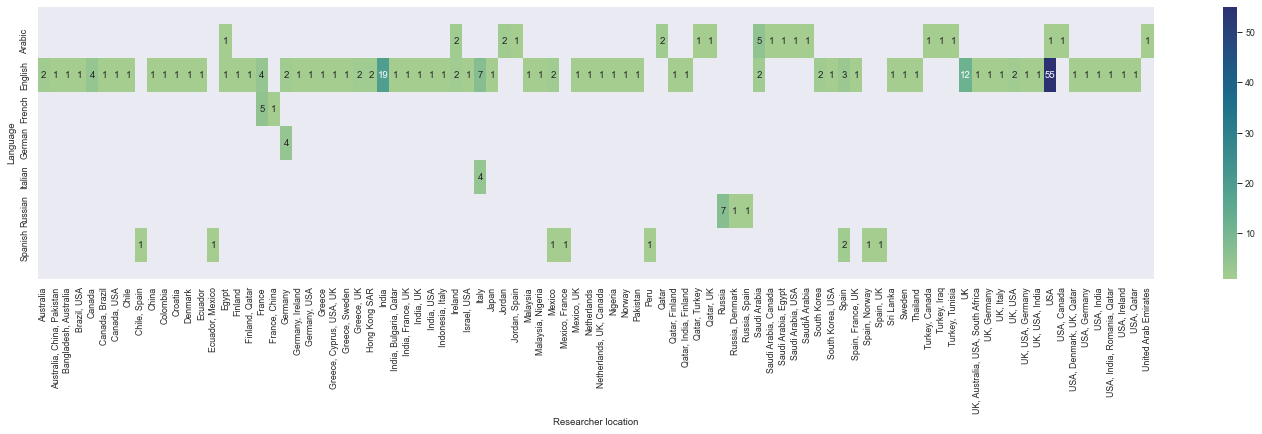

In [331]:
data_ = data[data['Language'].isin(['English', 'Arabic',
                                                              'Russian', 'French',
                                                              'Spanish', 'German',
                                                              'Italian'])]
fig, ax = plt.subplots(figsize=(25, 5))
ax = sns.heatmap(data_.groupby(['Language', 'Researcher location']).size().unstack(),
                 annot = True, cmap = 'crest')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### how many datasets are there in total?

In [332]:
data['Number of new datasets'].sum()

492.0

In [333]:
country_language_matrix = pd.DataFrame()

In [334]:
# split into each country

In [368]:
countries = data['Researcher location'].str.split(', ').values
countries = [i * int(data['Number of new datasets'][n]) for n, i in enumerate(countries)]
countries

[['SaudiArabia'],
 ['USA'],
 ['USA'],
 ['USA'],
 ['Australia'],
 ['USA'],
 ['India', 'USA'],
 ['Jordan'],
 ['USA'],
 ['UK'],
 ['Greece', 'UK', 'Greece', 'UK'],
 ['UK'],
 ['Germany',
  'Croatia',
  'UK',
  'Germany',
  'Croatia',
  'UK',
  'Germany',
  'Croatia',
  'UK',
  'Germany',
  'Croatia',
  'UK',
  'Germany',
  'Croatia',
  'UK'],
 ['Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy'],
 ['UK', 'UK'],
 ['Turkey', 'Tunisia'],
 ['Pakistan', 'Belgium'],
 ['Bangladesh'],
 ['UK', 'USA', 'Germany'],
 ['USA'],
 ['India', 'USA'],
 ['Portugal', 'Spain'],
 ['UK'],
 ['Saudi Arabia', 'Canada'],
 ['India'],
 ['Russia'],
 ['USA'],
 ['Indonesia'],
 ['Finland', 'Qatar'],
 ['UK', 'USA'],
 ['Turkey', 'Iraq'],
 ['Indonesia', 'Italy'],
 ['India', 'Ireland'],
 ['Pakistan'],
 ['Italy'],
 ['Mexico'],
 ['Australia', 'China', 'Pakistan'],
 ['India'],
 ['USA', 'USA', 'USA', 'USA'],
 ['USA'],
 ['China', 'USA'],
 ['Ireland', 'India', 'UK', 'Ireland', 'India', 'UK'],
 ['USA'],
 ['Germany', 'Germany'],
 ['Sp

In [369]:
#data['Researcher location'] = data['Researcher location'].replace("Saudi Arabia", "SaudiArabia" )
#data['Researcher location'] = data['Researcher location'].replace("South Korea", "SouthKorea" )

<AxesSubplot:xlabel='Researcher location'>

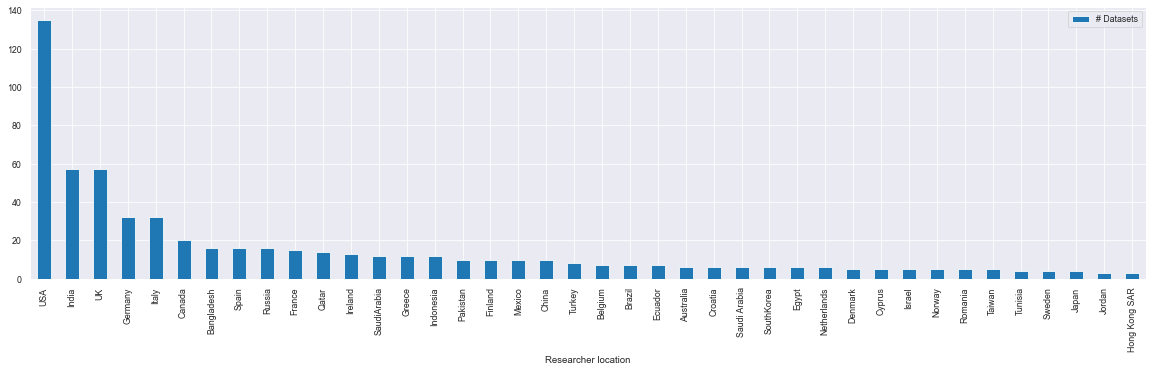

In [371]:
from collections import Counter

countries = data['Researcher location'].str.split(', ').values
# converting from paper level to dataset level
countries = [i * int(data['Number of new datasets'][n]) for n, i in enumerate(countries)]
country_list = [item for sublist in countries for item in sublist]
countries_df = pd.DataFrame(Counter(country_list).most_common(40))
countries_df.columns = ['Researcher location', '# Datasets']
countries_df = countries_df.set_index('Researcher location')

fig, ax = plt.subplots(figsize = (20, 5))
countries_df.plot(kind = 'bar', ax = ax)

In [372]:
countries_df

,# Datasets
Researcher location,
USA,135
India,57
UK,57
Germany,32
Italy,32
Canada,20
Bangladesh,16
Spain,16
Russia,16


In [373]:
len(country_list)

648

In [374]:
country_list = list(set(country_list))

In [375]:
len(data)

341

In [376]:
untargeted_data = data[data['Identity-directed'] == 'No']
untargeted_data = untargeted_data[untargeted_data['Affiliation-directed'] == 'No']
untargeted_data = untargeted_data[untargeted_data['Person-directed'] == 'No']
len(untargeted_data)

184

In [377]:
data.groupby(['General or specific']).size() # need to be updated?

General or specific
General     184
Specific    157
dtype: int64

<AxesSubplot:xlabel='Language'>

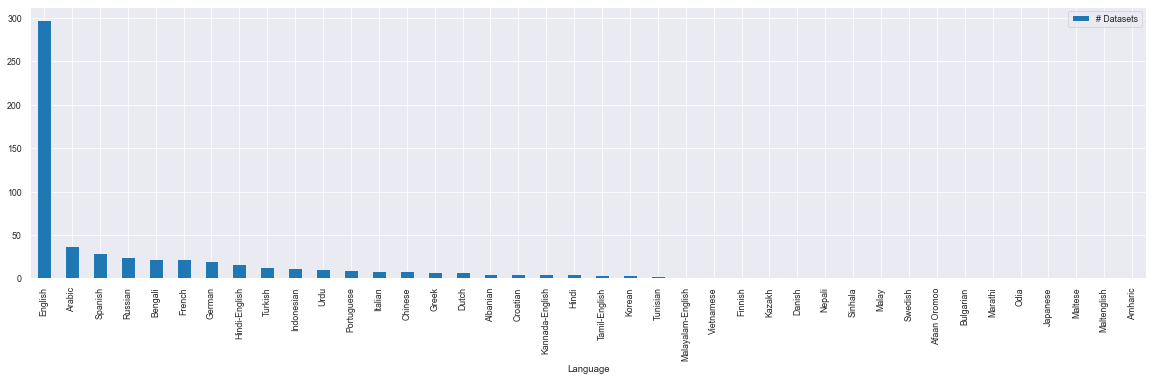

In [378]:
languages = data['Language'].str.split(', ').values
# converting from paper level to dataset level
languages = [i * int(data['Number of new datasets'][n]) for n, i in enumerate(languages)]
language_list = [item for sublist in languages for item in sublist]
languages_df = pd.DataFrame(Counter(language_list).most_common(40))
languages_df.columns = ['Language', '# Datasets']
languages_df = languages_df.set_index('Language')

fig, ax = plt.subplots(figsize = (20, 5))
languages_df.plot(kind = 'bar', ax = ax)

In [379]:
languages_df.head(20)

,# Datasets
Language,
English,298
Arabic,37
Spanish,29
Russian,25
Bengali,22
French,22
German,20
Hindi-English,17
Turkish,13


In [380]:
298 / data['Number of new datasets'].sum()

0.6056910569105691

In [381]:
top_languages = ['English',
 'Arabic',
 'Russian',
 'French',
 'Spanish',
 'German',
 'Italian',
 'Chinese',
 'Hindi',
 'Portuguese']
top_languages = [i[0] for i in languages_df.reset_index('Language').values][:16]
top_languages

['English',
 'Arabic',
 'Spanish',
 'Russian',
 'Bengali',
 'French',
 'German',
 'Hindi-English',
 'Turkish',
 'Indonesian',
 'Urdu',
 'Portuguese',
 'Italian',
 'Chinese',
 'Greek',
 'Dutch']

In [389]:
country_lang_dict = {}

for country in country_list:
    country_lang_dict[country] = []


for _, row in data.iterrows():
    for country in country_list:
        # print(row['Researcher location'].split(', '))
        if country in row['Researcher location'].split(', '):
            # converting from paper level to dataset level
            country_lang_dict[country].extend(row['Language'].split(', ') * int(row['Number of new datasets']))
            
for country in country_lang_dict:
    country_lang_dict[country] = dict(Counter(country_lang_dict[country]))

In [390]:
plot_df = pd.DataFrame(country_lang_dict).T[top_languages].T.dropna(axis=1, how='all')
plot_df = plot_df.sort_values(by=top_languages, ascending=False, axis=1)

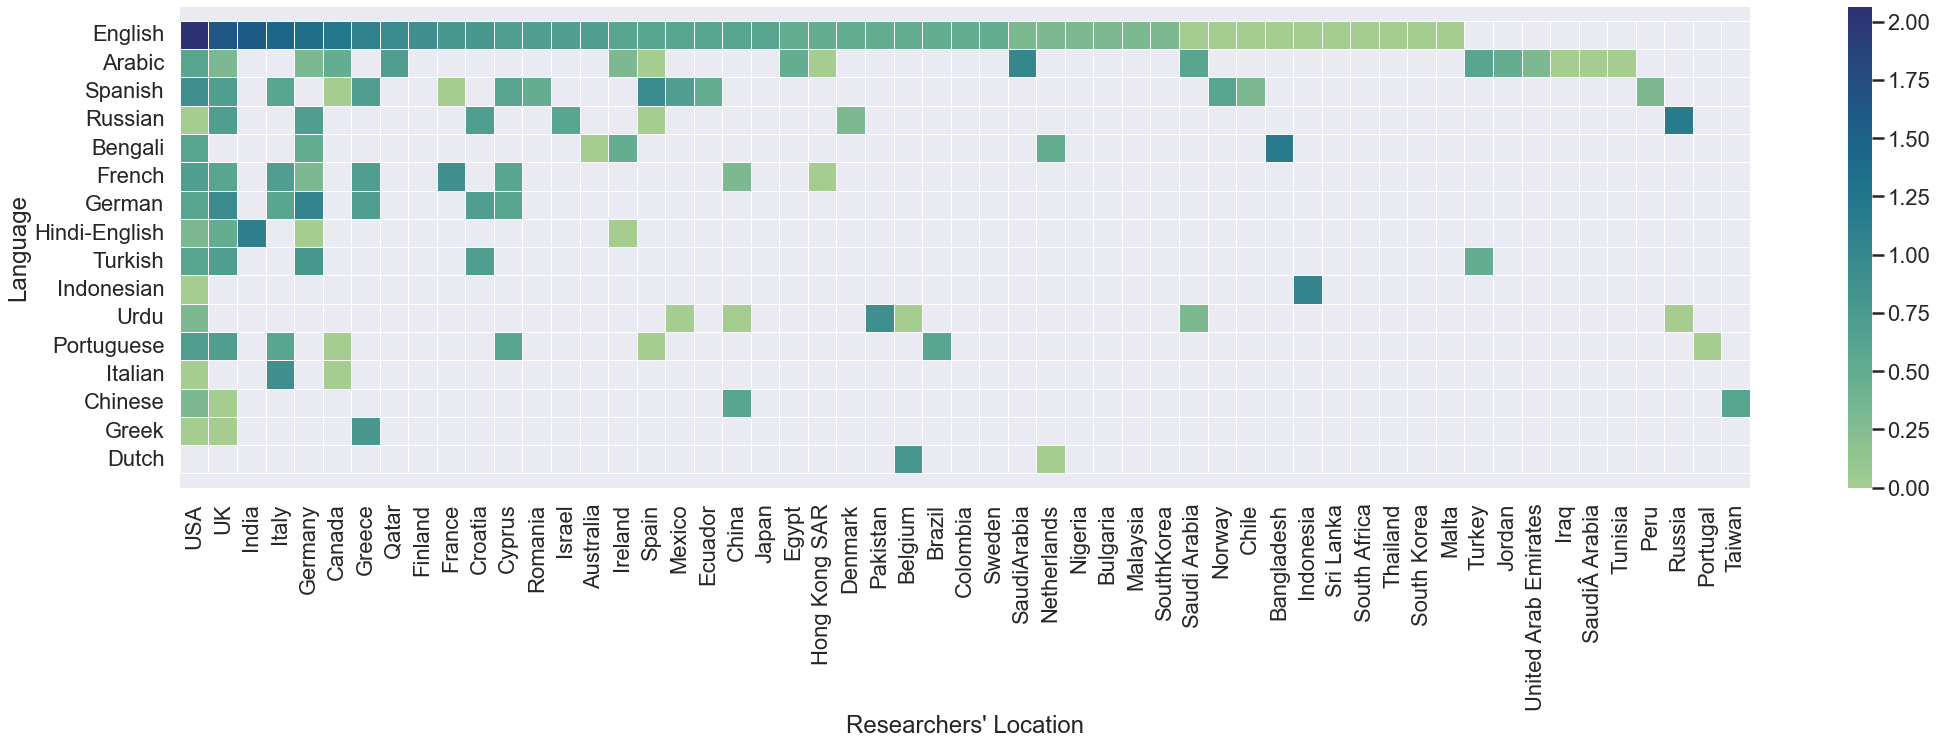

In [392]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(30, 10.5))
ax = sns.heatmap(np.log10(plot_df), linewidth=.5, # vmin=0, vmax=100,
                 # annot = True, annot_kws={"fontsize":20},
                 cmap = 'crest')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
ax.set_xlabel('Researchers\' Location')
ax.set_ylabel('Language')
plt.savefig('location_languages_heatmap_no_numbers_dataset.pdf', dpi = 400,  bbox_inches='tight', pad_inches=0.01)

In [393]:
plot_df.T.sum()

English          395.0
Arabic            49.0
Spanish           56.0
Russian           38.0
Bengali           29.0
French            36.0
German            42.0
Hindi-English     20.0
Turkish           23.0
Indonesian        12.0
Urdu              16.0
Portuguese        25.0
Italian           10.0
Chinese           11.0
Greek              8.0
Dutch              7.0
dtype: float64

In [394]:
# plot_df = plot_df.reset_index()
# plot_df.columns = ['Language'] + plot_df.columns[1:]
plot_df.index.names = ['Language']
plot_df = plot_df.reset_index()
plot_df

,Language,USA,UK,India,Italy,Germany,Canada,Greece,Qatar,Finland,...,Turkey,Jordan,United Arab Emirates,Iraq,SaudiÂ Arabia,Tunisia,Peru,Russia,Portugal,Taiwan
0,English,116.0,44.0,37.0,28.0,22.0,17.0,12.0,9.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arabic,4.0,2.0,NaN,NaN,2.0,3.0,NaN,5.0,NaN,...,4.0,3.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,Spanish,8.0,5.0,NaN,4.0,NaN,1.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,Russian,1.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
4,Bengali,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,French,5.0,4.0,NaN,5.0,2.0,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,German,4.0,9.0,NaN,4.0,11.0,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Hindi-English,2.0,3.0,13.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Turkish,4.0,5.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Indonesian,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [395]:
reduced_country_list = plot_df.columns[1:]
scatter_plot_df = pd.melt(plot_df, id_vars=['Language'], value_vars=reduced_country_list)
scatter_plot_df

,Language,variable,value
0,English,USA,116.0
1,Arabic,USA,4.0
2,Spanish,USA,8.0
3,Russian,USA,1.0
4,Bengali,USA,4.0
...,...,...,...
875,Portuguese,Taiwan,NaN
876,Italian,Taiwan,NaN
877,Chinese,Taiwan,4.0
878,Greek,Taiwan,NaN


In [396]:
data_.groupby(['Language', 'General or specific']).size().unstack().sort_values('Specific', ascending = False)

General or specific,General,Specific
Language,,
English,95,79
Arabic,12,13
French,1,5
Spanish,4,5
Russian,5,4
Italian,1,3
German,3,1


In [397]:
data__ = data_[data_['Language'] == 'Arabic']
data__ = data__

In [398]:
data.groupby(['Language', 'General or specific']).size().unstack().sort_values('General', ascending = False)

General or specific,General,Specific
Language,,
English,95.0,79.0
Arabic,12.0,13.0
Hindi-English,10.0,4.0
Indonesian,9.0,1.0
Bengali,7.0,7.0
Urdu,6.0,2.0
Russian,5.0,4.0
Spanish,4.0,5.0
Portuguese,3.0,1.0


In [399]:
data.groupby('General or specific').size()

General or specific
General     184
Specific    157
dtype: int64

In [400]:
data.groupby('topical focus').size().sort_values(ascending = False).head(10)

topical focus
Hate Speech                   77
Cyberbullying                 34
Abusiveness                   25
Offensiveness                 23
Toxicity                      21
Sexism                         7
Racism                         5
Misogyny                       5
Aggressiveness                 4
Hate Speech, Offensiveness     3
dtype: int64

In [401]:
data.groupby(['topical focus', 'General or specific']).size().unstack().sort_values('General', ascending = False)

General or specific,General,Specific
topical focus,,
Hate Speech,40.0,37.0
Cyberbullying,26.0,8.0
Abusiveness,18.0,7.0
Offensiveness,17.0,6.0
Toxicity,15.0,6.0
...,...,...
"Toxicity, Hate Speech, Abusiveness",NaN,1.0
Victim Blaming,NaN,1.0
"Violent Extremism, Pro-ISIS",NaN,1.0


In [402]:
data.groupby(['topical focus', 'General or specific']).size().unstack().sort_values('Specific', ascending = False).head(10)

General or specific,General,Specific
topical focus,,
Hate Speech,40.0,37.0
Cyberbullying,26.0,8.0
Abusiveness,18.0,7.0
Sexism,NaN,7.0
Toxicity,15.0,6.0
Offensiveness,17.0,6.0
Racism,NaN,5.0
Misogyny,NaN,5.0
Sexual Harassment,NaN,2.0


### targets and languages

In [403]:
data[['Conceptualization', 'Reported']].isna().sum()

Conceptualization    173
Reported             184
dtype: int64

In [404]:
# define two more target categories: union and intersection

unions = []
intersections = []

for _, row in data.iterrows():
    conceptual_targets = set(row['Conceptualization'].split(', ')) if type(row['Conceptualization']) == str else set([])
    reported_targets = set(row['Reported'].split(', ')) if type(row['Reported'])  == str else set([])
    # print(conceptual_targets, reported_targets)
    if len(reported_targets) == 0 or len(conceptual_targets) == 0:
        intersections.append(np.NaN)
    else:
        intersections.append(', '.join(list(conceptual_targets.intersection(reported_targets))))
    if len(reported_targets) == 0 and len(conceptual_targets) == 0:
        unions.append(np.NaN)
    else:
        unions.append(', '.join(list(conceptual_targets.union(reported_targets))))
        
data['Conceptualization or Reported'] = unions
data['Conceptualization and Reported'] = intersections

In [405]:
data[['Conceptualization', 'Reported', 'Conceptualization or Reported', 'Conceptualization and Reported']].head(10)

,Conceptualization,Reported,Conceptualization or Reported,Conceptualization and Reported
0,NaN,"religion, political, other","other, religion, political",NaN
1,"race, nationality","race, nationality","race, nationality","race, nationality"
2,"race, gender, sexuality, religion, age, nationality, disability, body, class","race, gender, class, nationality, religion, age, sexuality, body, disability","age, class, nationality, religion, body, disability, sexuality, race, gender","age, class, nationality, religion, body, disability, sexuality, race, gender"
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,"race, gender, sexuality, political","race, sexuality, gender, political",NaN
7,"race, gender, nationality, religion",NaN,"race, nationality, gender, religion",NaN
8,NaN,other,other,NaN
9,"gender, sexuality, race, other",NaN,"race, other, sexuality, gender",NaN


In [406]:
data[data['id'] == 314][['Conceptualization', 'Reported', 'Conceptualization or Reported', 'Conceptualization and Reported']].head(10)

,Conceptualization,Reported,Conceptualization or Reported,Conceptualization and Reported
221,NaN,"religion, race, nationality, class, political, organization/institution, other","class, organization/institution, race, nationality, other, religion, political",NaN


In [407]:
target_levels = ['Conceptualization', 'Reported', 'Conceptualization or Reported', 'Conceptualization and Reported']
for target_level in target_levels:
    print('target level # targets # targets missing ')
    print(target_level, len(data) - data[target_level].isna().sum(), data[target_level].isna().sum())

target level # targets # targets missing 
Conceptualization 168 173
target level # targets # targets missing 
Reported 157 184
target level # targets # targets missing 
Conceptualization or Reported 220 121
target level # targets # targets missing 
Conceptualization and Reported 105 236


In [408]:
target_level = 'Conceptualization or Reported' # 'Conceptualization'
target_level

'Conceptualization or Reported'

In [409]:
data_prev = data.copy()
# data['Identity-directed_summary'] = data['Re-annotate']

In [410]:
# targeted_data = data[data['Identity-directed'] == 'Yes']
all_targets = {'identity-directed' : []}

targeted_data = data.dropna(subset = [target_level])

all_targets['Identity-directed'] = [i if type(i) == list else '' for i in targeted_data[target_level].str.lower().str.split(', ').values]

In [411]:
targeted_data_df = {}
targeted_data_df['Identity-directed'] = data.dropna(subset = [target_level])

len(targeted_data_df['Identity-directed'])

220

In [412]:
len(targeted_data)

220

In [413]:
len(data) - len(targeted_data)

121

In [414]:
for target_type in ['Identity-directed']:
    all_targets[target_type] = [item for sublist in all_targets[target_type] for item in sublist]

In [415]:
common_targets = list(set([i[0].strip() for i in Counter(all_targets['Identity-directed']).most_common(100)]))
common_targets

['',
 'age',
 'class',
 'nationality',
 'religion',
 'political',
 'body',
 'disability',
 'sexuality',
 'organization/institution',
 'race',
 'other',
 'gender']

In [416]:
# delete this because they are not 'identities'
to_remove = ['profane', 'insult', 'obscene', 'specific person', 'group-targeted', 'individual',
 'group',
 'identity',
 'behavior',
 'terrorism',
 'not specified', 
            '']

for target in to_remove:
    if target in common_targets:
        common_targets.remove(target)

In [417]:
# merge_dict = {'gender': ['gender', 'sexism', 'sex', 'gender/sex'],
#               'political' : ['politics', 'political', 'political affiliation', 'ideology'],
#               'religion' : ['religious', 'religion', 'religious belief'],
#               'race' : ['race', 'racism', 'race/ethnicity', 'ethnicity'],
#               # 'class' : ['class'], 
#               'sexual orientation' : ['sexual orientation', 'sexuality'],
#               'nationality' : ['nationality', 'national origin'],
#               'age' : ['age', 'age/body'],
#               'body' : ['age/body']
#              }


merge_dict = {
#               'gender' : ['gender'], # 'religion,â\xa0gender'], #['gender', 'gender.', 'sexism', 'religion,â\xa0gender'],
#               'disability' : ['disability', 'disabilities'],
#               'religion' : ['religion'],#, 'religion,â\xa0gender'], #['religion', 'religion,â\xa0gender', 'islamic'],
#               'political' : ['political'],
#              'race': ['race', 'race.', 'race,nationality'], #, 'sexuality,race', 'ethnicity'],
#              'nationality' : ['nationality', 'race,nationality'],
              'org/instit' : ['organization/institution'],
#               'sexuality' : ['sexuality']#['sexuality', 'sexuality,race', 'sexuaity']
             }

In [418]:
# create a language-target matrix
target_column = {}

for target in common_targets:
    target_column[target] = [] 
    for _, row in targeted_data_df['Identity-directed'].iterrows():
        # print(row['Identity-directed_1_TEXT'])
        # if type(row['Identity-directed_1_TEXT']) == str and target in row['Identity-directed_1_TEXT'].lower():
        if type(row[target_level]) == str and target in row[target_level].lower():
            # target_column[target].append(1)
            # converting from paper level to dataset level
            target_column[target].append(row['Number of new datasets'])
        else:
            target_column[target].append(0)
    targeted_data_df['Identity-directed'][target] = target_column[target] 

/var/folders/5r/7t2d12d16c9dtlzjzc9p6xjr0000gn/T/ipykernel_64308/1304221276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targeted_data_df['Identity-directed'][target] = target_column[target]
/var/folders/5r/7t2d12d16c9dtlzjzc9p6xjr0000gn/T/ipykernel_64308/1304221276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targeted_data_df['Identity-directed'][target] = target_column[target]
/var/folders/5r/7t2d12d16c9dtlzjzc9p6xjr0000gn/T/ipykernel_64308/1304221276.py:15: SettingWithCopyWarning: 
A valu

In [419]:
# not taking into account dataset with multiple languages
language_target_df = targeted_data_df['Identity-directed'][targeted_data_df['Identity-directed']['Language'].isin(top_languages)]

# taking into account multiple languages

target_language_dict = {}
for lang in top_languages:
    target_language_dict[lang] = {}
    for target in common_targets:
        target_language_dict[lang][target] = 0
        
    for _, row in targeted_data_df['Identity-directed'].iterrows():
        if lang in row['Language'].split(', '):
            for target in common_targets:
                # if type(row['Identity-directed_1_TEXT']) == str and target in row['Identity-directed_1_TEXT'].lower():
                if type(row[target_level]) == str and target in row[target_level].lower():
                    # target_language_dict[lang][target] = target_language_dict[lang][target] + 1
                    # converting from paper level to dataset level
                    target_language_dict[lang][target] = target_language_dict[lang][target] + row['Number of new datasets']
                    
                    

plot_df = language_target_df.groupby('Language')[[i for i in common_targets]].sum()
plot_df2 = pd.DataFrame(target_language_dict).T.rename_axis('Language').reset_index().set_index('Language')

In [420]:
plot_df2.columns

Index(['age', 'class', 'nationality', 'religion', 'political', 'body',
       'disability', 'sexuality', 'organization/institution', 'race', 'other',
       'gender'],
      dtype='object')

In [421]:
plot_df.columns

Index(['age', 'class', 'nationality', 'religion', 'political', 'body',
       'disability', 'sexuality', 'organization/institution', 'race', 'other',
       'gender'],
      dtype='object')

In [422]:
for big_target in merge_dict:
    for small_target in merge_dict[big_target]:
        # print(small_target)
        if small_target in common_targets:
            common_targets.remove(small_target)
    common_targets.append(big_target)
    
common_targets

['age',
 'class',
 'nationality',
 'religion',
 'political',
 'body',
 'disability',
 'sexuality',
 'race',
 'other',
 'gender',
 'org/instit']

In [423]:
for big_category in merge_dict:
    plot_df[big_category] = plot_df[merge_dict[big_category]].sum(axis = 1)
    plot_df2[big_category] = plot_df2[merge_dict[big_category]].sum(axis = 1)
    
plot_df = plot_df[common_targets]
plot_df2 = plot_df2[common_targets]

In [424]:
plot_df

,age,class,nationality,religion,political,body,disability,sexuality,race,other,gender,org/instit
Language,,,,,,,,,,,,
Arabic,0.0,0.0,9.0,17.0,5.0,3.0,3.0,4.0,13.0,6.0,9.0,2.0
Bengali,0.0,0.0,4.0,9.0,8.0,3.0,3.0,10.0,8.0,4.0,10.0,0.0
Chinese,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Dutch,0.0,0.0,3.0,4.0,1.0,0.0,1.0,0.0,4.0,4.0,1.0,0.0
English,8.0,9.0,42.0,79.0,37.0,16.0,24.0,68.0,102.0,45.0,91.0,6.0
French,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0
German,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0
Greek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Hindi-English,0.0,0.0,3.0,5.0,4.0,1.0,2.0,3.0,7.0,2.0,8.0,0.0


In [425]:
plot_df2

,age,class,nationality,religion,political,body,disability,sexuality,race,other,gender,org/instit
Language,,,,,,,,,,,,
English,9.0,10.0,48.0,83.0,48.0,17.0,26.0,74.0,116.0,60.0,98.0,6.0
Arabic,0.0,0.0,9.0,19.0,6.0,3.0,4.0,5.0,14.0,8.0,10.0,2.0
Spanish,1.0,0.0,5.0,1.0,7.0,0.0,1.0,1.0,6.0,6.0,10.0,0.0
Russian,0.0,0.0,1.0,7.0,8.0,2.0,0.0,2.0,6.0,4.0,2.0,0.0
Bengali,0.0,0.0,4.0,10.0,9.0,3.0,3.0,10.0,8.0,5.0,10.0,0.0
French,0.0,1.0,4.0,3.0,5.0,1.0,1.0,3.0,7.0,8.0,8.0,0.0
German,0.0,0.0,5.0,1.0,5.0,0.0,0.0,0.0,6.0,6.0,1.0,0.0
Hindi-English,0.0,0.0,3.0,5.0,4.0,1.0,2.0,3.0,7.0,2.0,8.0,0.0
Turkish,0.0,0.0,4.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [426]:
# add the untargeted part
# untargeted_data = data[data['Identity-directed'] == 'No']
# untargeted_data = untargeted_data[untargeted_data['Affiliation-directed'] == 'No']
# untargeted_data = untargeted_data[untargeted_data['Person-directed'] == 'No']
untargeted_data = data[data[target_level].isna()]
print(len(untargeted_data))

untargeted_langs = {}
for lang in top_languages:
    untargeted_langs[lang] = 0
    
for _, row in untargeted_data.iterrows():
    for lang in top_languages:
        if lang in row['Language'].split(', '):
            # converting from paper level to dataset level
            untargeted_langs[lang] += row['Number of new datasets']
            
untargeted_info2 = pd.DataFrame.from_dict(untargeted_langs, orient='index', columns = ['untargeted']).reset_index()
untargeted_info2.columns = ['Language', 'untargeted']
        
untargeted_data = untargeted_data[untargeted_data['Language'].isin(top_languages)]
untargeted_info = pd.DataFrame(untargeted_data.groupby('Language').size().sort_values(ascending = False),
                               columns = ['untargeted']).reset_index()

121


In [427]:
untargeted_info

,Language,untargeted
0,English,71
1,Arabic,6
2,Hindi-English,6
3,Bengali,5
4,Indonesian,5
5,Chinese,3
6,Russian,3
7,Spanish,3
8,Urdu,3
9,Turkish,2


In [428]:
untargeted_info2

,Language,untargeted
0,English,113.0
1,Arabic,13.0
2,Spanish,9.0
3,Russian,9.0
4,Bengali,9.0
5,French,4.0
6,German,8.0
7,Hindi-English,7.0
8,Turkish,8.0
9,Indonesian,6.0


In [429]:
plot_df = untargeted_info.merge(plot_df.reset_index(), how = 'outer', on = 'Language').replace(0, np.nan)
plot_df2 = untargeted_info2.merge(plot_df2.reset_index(), how = 'outer', on = 'Language').replace(0, np.nan)

(16.5, -0.5)

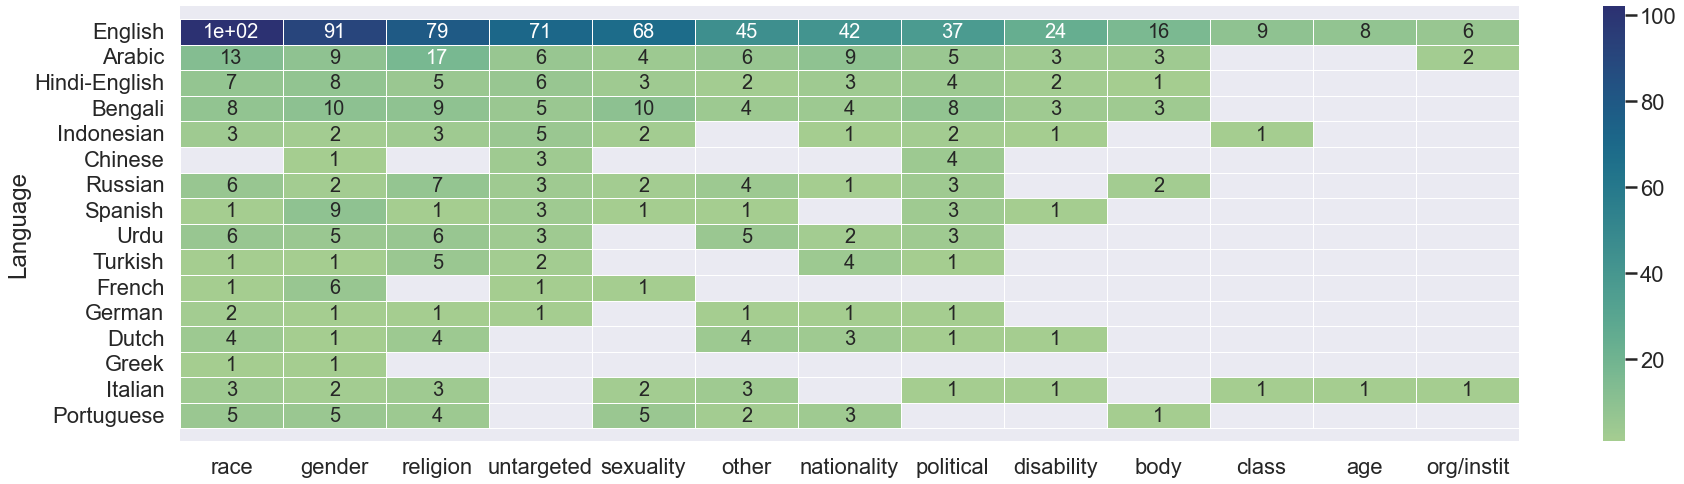

In [430]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(30, 8))
ax = sns.heatmap(plot_df.set_index('Language').sort_values('English', axis = 1, ascending = False),
                 linewidth=.5, # vmin=-20, vmax=100,
                 annot = True, annot_kws={"fontsize":20},
                 cmap = 'crest')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [431]:
plot_df2.set_index('Language').sort_values('English', axis = 1, ascending = False)

,race,untargeted,gender,religion,sexuality,other,nationality,political,disability,body,class,age,org/instit
Language,,,,,,,,,,,,,
English,116.0,113.0,98.0,83.0,74.0,60.0,48.0,48.0,26.0,17.0,10.0,9.0,6.0
Arabic,14.0,13.0,10.0,19.0,5.0,8.0,9.0,6.0,4.0,3.0,NaN,NaN,2.0
Spanish,6.0,9.0,10.0,1.0,1.0,6.0,5.0,7.0,1.0,NaN,NaN,1.0,NaN
Russian,6.0,9.0,2.0,7.0,2.0,4.0,1.0,8.0,NaN,2.0,NaN,NaN,NaN
Bengali,8.0,9.0,10.0,10.0,10.0,5.0,4.0,9.0,3.0,3.0,NaN,NaN,NaN
French,7.0,4.0,8.0,3.0,3.0,8.0,4.0,5.0,1.0,1.0,1.0,NaN,NaN
German,6.0,8.0,1.0,1.0,NaN,6.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN
Hindi-English,7.0,7.0,8.0,5.0,3.0,2.0,3.0,4.0,2.0,1.0,NaN,NaN,NaN
Turkish,1.0,8.0,1.0,5.0,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN


In [432]:
plot_df2 = plot_df2.set_index('Language').sort_values(['English'], axis = 1, ascending = False)
cols = list(plot_df2.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('untargeted')) #Remove x from list
plot_df2 = plot_df2[cols+['untargeted']] #Create new dataframe with columns in the order you want

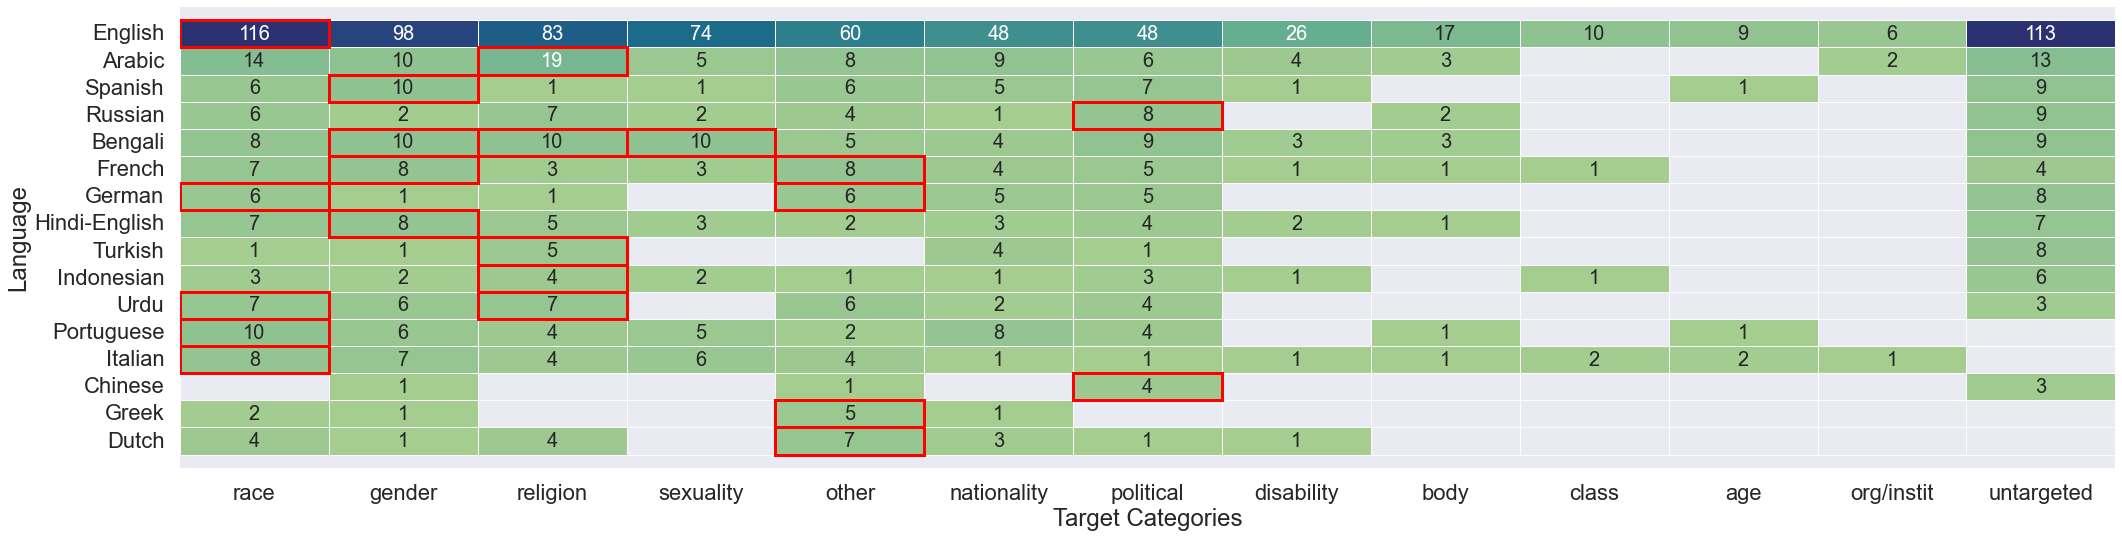

In [434]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(30, 8))
ax = sns.heatmap(plot_df2,
                 linewidth=.5, # vmin=-20, 
                 vmax=110, fmt='.0f',
                 annot = True, annot_kws={"fontsize":20},
                 cmap = 'crest', cbar=False)
bottom, top = ax.get_ylim()

# highlight the top targets for each language
ax.add_patch(Rectangle((0, 0), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((2, 1), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((1, 2), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((6, 3), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((1, 4), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((2, 4), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((3, 4), 1, 1, fill=False, edgecolor='red', lw=3))

ax.add_patch(Rectangle((1, 5), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((4, 5), 1, 1, fill=False, edgecolor='red', lw=3))

ax.add_patch(Rectangle((0, 6), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((4, 6), 1, 1, fill=False, edgecolor='red', lw=3))

ax.add_patch(Rectangle((1, 7), 1, 1, fill=False, edgecolor='red', lw=3))

ax.add_patch(Rectangle((2, 8), 1, 1, fill=False, edgecolor='red', lw=3))

ax.add_patch(Rectangle((2, 9), 1, 1, fill=False, edgecolor='red', lw=3))

ax.add_patch(Rectangle((0, 10), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((2, 10), 1, 1, fill=False, edgecolor='red', lw=3))

ax.add_patch(Rectangle((0, 11), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((0, 12), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((6, 13), 1, 1, fill=False, edgecolor='red', lw=3))

ax.add_patch(Rectangle((4, 14), 1, 1, fill=False, edgecolor='red', lw=3))

ax.add_patch(Rectangle((4, 15), 1, 1, fill=False, edgecolor='red', lw=3))

ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Target Categories')
plt.tight_layout()
plt.savefig('target_languages_heatmap_%s_dataset.pdf' %(target_level), dpi = 400)

In [435]:
plot_df2.sort_values('untargeted', ascending = False)

,race,gender,religion,sexuality,other,nationality,political,disability,body,class,age,org/instit,untargeted
Language,,,,,,,,,,,,,
English,116.0,98.0,83.0,74.0,60.0,48.0,48.0,26.0,17.0,10.0,9.0,6.0,113.0
Arabic,14.0,10.0,19.0,5.0,8.0,9.0,6.0,4.0,3.0,NaN,NaN,2.0,13.0
Spanish,6.0,10.0,1.0,1.0,6.0,5.0,7.0,1.0,NaN,NaN,1.0,NaN,9.0
Russian,6.0,2.0,7.0,2.0,4.0,1.0,8.0,NaN,2.0,NaN,NaN,NaN,9.0
Bengali,8.0,10.0,10.0,10.0,5.0,4.0,9.0,3.0,3.0,NaN,NaN,NaN,9.0
German,6.0,1.0,1.0,NaN,6.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,8.0
Turkish,1.0,1.0,5.0,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,8.0
Hindi-English,7.0,8.0,5.0,3.0,2.0,3.0,4.0,2.0,1.0,NaN,NaN,NaN,7.0
Indonesian,3.0,2.0,4.0,2.0,1.0,1.0,3.0,1.0,NaN,1.0,NaN,NaN,6.0


In [436]:
top_languages

['English',
 'Arabic',
 'Spanish',
 'Russian',
 'Bengali',
 'French',
 'German',
 'Hindi-English',
 'Turkish',
 'Indonesian',
 'Urdu',
 'Portuguese',
 'Italian',
 'Chinese',
 'Greek',
 'Dutch']

### Temporal Analysis

In [437]:
# !pip install plotly

In [438]:
# TODO: Parallel coordinates plot
data['Publication date']

0       03.12.2021
1       06.07.2019
2       30.09.2020
3      05.02.2020 
4       11.06.2021
          ...     
336     04.04.2019
337     20.07.2018
338     09.10.2021
339     17.06.2016
340     XX.05.2017
Name: Publication date, Length: 341, dtype: object

In [439]:
data['Publication Year'] = [row['Publication date'][-4:] for _, row in data.iterrows()]
untargeted_data['Publication Year'] = [row['Publication date'][-4:] for _, row in untargeted_data.iterrows()]
data.groupby('Publication Year').size()

Publication Year
020       1
2012      1
2013      2
2014      2
2015      2
2016      8
2017     16
2018     36
2019     45
2020     91
2021    113
2022     24
dtype: int64

In [440]:
buckets = {'2012-2013' : ['2012', '2013'],
           '2014-2015' : ['2014', '2015'],
           '2016-2017' : ['2016', '2017'], 
           '2018-2019' : ['2018', '2019'],
           '2020-2021' : ['2020', '020 ', '2021', '1.21', '6/15', '10/7'],
           '2022' : ['2022']
          }

buckets = {'2012' : ['2012'],
           '2013' : ['2013'],
           '2014' : ['2014'],
           '2015' : ['2015'],
           '2016' : ['2016'],
           '2017' : ['2017'], 
           '2018' : ['2018'],
           '2019' : ['2019'],
           '2020' : ['2020', '020 '],
           '2021' : ['2021', '1.21', '6/15', '10/7'],
           '2022' : ['2022']
          }

inversted_buckets = {}
for k,v in buckets.items():
    for x in v:
        inversted_buckets.setdefault(x,[]).append(k)

In [441]:
# untargeted_data = data[data['Identity-directed'] == 'No']
# untargeted_data = untargeted_data[untargeted_data['Affiliation-directed'] == 'No']
# untargeted_data = untargeted_data[untargeted_data['Person-directed'] == 'No']

untargeted_data = data[data[target_level].isna()]

In [442]:
data['Publication period'] = [inversted_buckets[row['Publication Year']][0] for _, row in data.iterrows()]
untargeted_data['Publication period'] = [inversted_buckets[row['Publication Year']][0] for _, row in untargeted_data.iterrows()]

/var/folders/5r/7t2d12d16c9dtlzjzc9p6xjr0000gn/T/ipykernel_64308/931285842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  untargeted_data['Publication period'] = [inversted_buckets[row['Publication Year']][0] for _, row in untargeted_data.iterrows()]


In [443]:
data.groupby(['Publication period']).size().sum()

341

In [444]:
len(untargeted_data)

121

In [445]:
untargeted_data.groupby(['Publication period']).size().sum()

121

In [446]:
# taking into account multiple languages

time_language_dict = {}
for lang in top_languages:
    time_language_dict[lang] = {}
    for time_bucket in buckets:
        time_language_dict[lang][time_bucket] = 0
        
    for _, row in data.iterrows():
        if lang in row['Language'].split(', '):
            # time_language_dict[lang][row['Publication period']] += 1
            # converting from paper-level to dataset-level
            time_language_dict[lang][row['Publication period']] += row['Number of new datasets']

In [447]:
time_language_df = pd.DataFrame(time_language_dict).T.rename_axis('Language').reset_index().set_index('Language')#.reset_index()

In [448]:
# time_language_df['Language ID'] = time_language_df['Language'].astype('category').cat.codes
time_language_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Language,,,,,,,,,,,
English,2.0,2.0,3.0,3.0,10.0,24.0,32.0,40.0,79.0,88.0,15.0
Arabic,0.0,0.0,0.0,0.0,0.0,3.0,5.0,4.0,7.0,15.0,3.0
Spanish,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,10.0,11.0,0.0
Russian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,9.0,9.0,1.0
Bengali,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,14.0,0.0
French,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,8.0,7.0,0.0
German,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,10.0,4.0,0.0
Hindi-English,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,6.0,3.0,4.0
Turkish,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,6.0,2.0,0.0


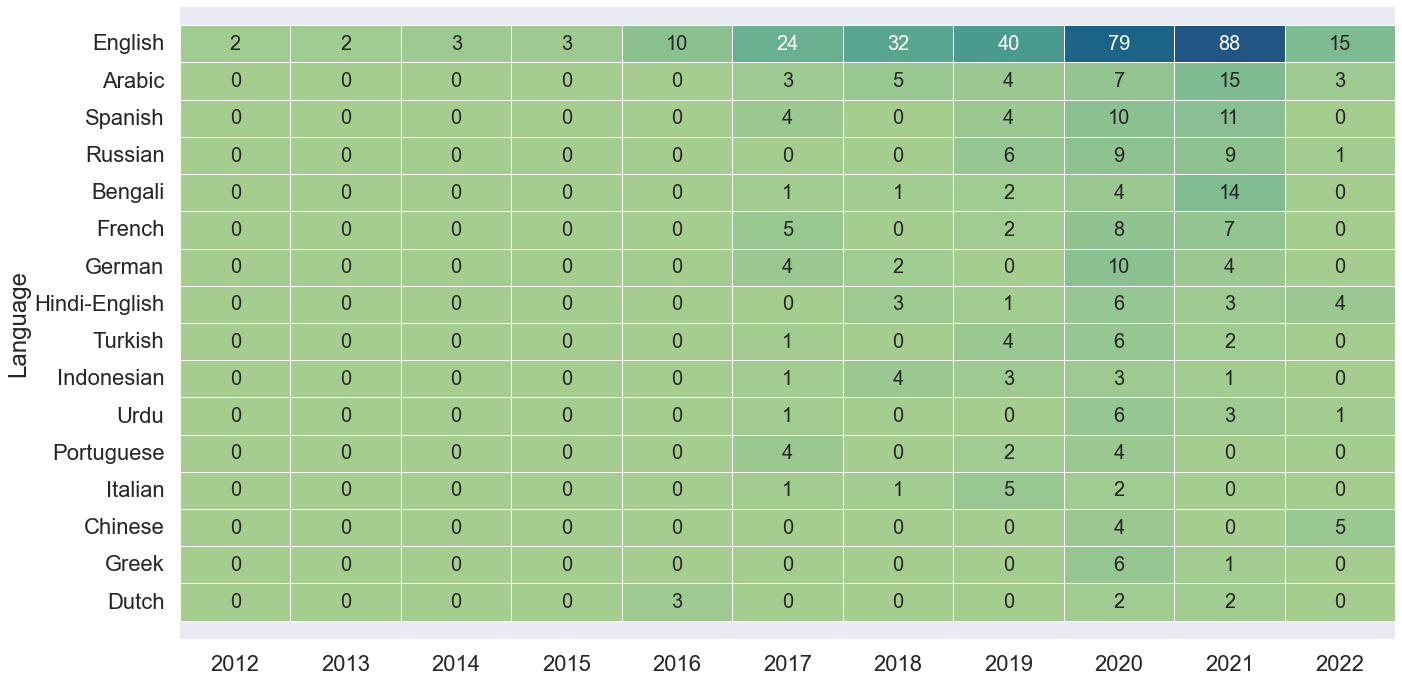

In [449]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(time_language_df,
                 linewidth=.5, # vmin=-20, 
                 vmax=110, fmt='.0f',
                 annot = True, annot_kws={"fontsize":20},
                 cmap = 'crest', cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()

In [450]:
time_language_df_ = time_language_df.reset_index()
time_language_df_['Language ID'] = time_language_df_['Language'].astype('category').cat.codes

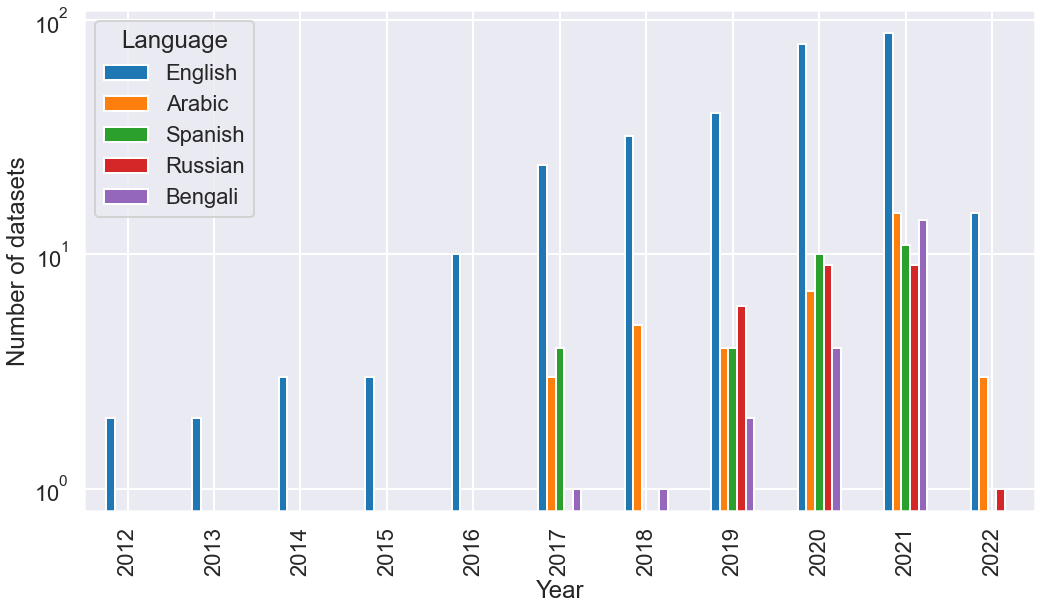

In [451]:
fig, ax = plt.subplots(figsize=(15, 9))
time_language_df.head(5).T.plot(kind = 'bar', ax = ax, color = sns.color_palette())
ax.set_yscale('log')
ax.set_ylabel('Number of datasets')
ax.set_xlabel('Year')
plt.tight_layout()

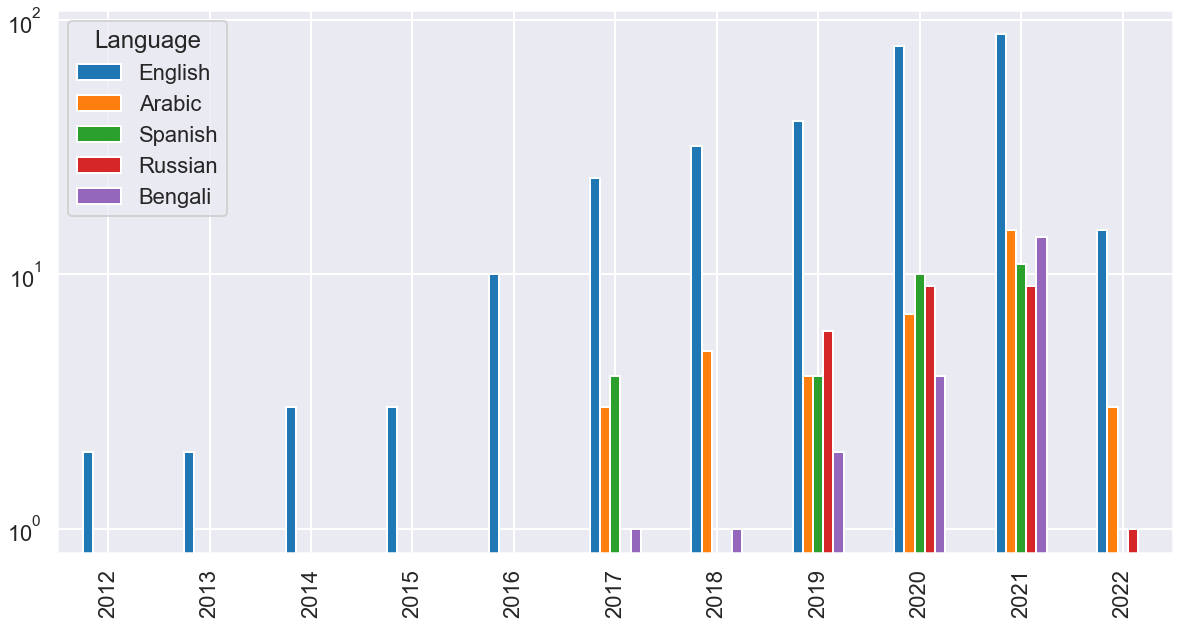

In [452]:
fig, ax = plt.subplots(figsize=(20, 10))
time_language_df.head(5).T.plot(kind = 'bar', ax = ax, color = sns.color_palette())
ax.set_yscale('log')

In [453]:
time_language_df_ = time_language_df.head(5).reset_index()
time_language_df_['Language ID'] = time_language_df_['Language'].astype('category').cat.codes
time_language_df_

,Language,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Language ID
0,English,2.0,2.0,3.0,3.0,10.0,24.0,32.0,40.0,79.0,88.0,15.0,2
1,Arabic,0.0,0.0,0.0,0.0,0.0,3.0,5.0,4.0,7.0,15.0,3.0,0
2,Spanish,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,10.0,11.0,0.0,4
3,Russian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,9.0,9.0,1.0,3
4,Bengali,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,14.0,0.0,1


In [454]:
merge_dict = {'disability': ['disabi'],
 # 'religion': ['religion. political'],
 # 'political': ['religion. political'],
 # 'race': ['race', 'race,nationality'],
 # 'nationality': ['nationality '],
 'org/instit': ['organization/institution']}

merge_dict = {'age' : ['age'],
              'other' : ['other'],
              'class' : ['class'],
              'body' : ['body'],
              'gender' : ['gender', 'gender.', 'sexism', 'religion,â\xa0gender'],
              'disability' : ['disability', 'disabilities', 'disablity'],
              'religion' : ['religion', 'religion,â\xa0gender', 'islamic'],
              'political' : ['political'],
              'race': ['race', 'race,nationality', 'race.', 'sexuality,race', 'ethnicity'],
              'nationality' : ['nationality', 'race,nationality'],
              'org/instit' : ['organization/institution'],
              'sexuality' : ['sexuality', 'sexuality,race', 'sexuaity']
             }

In [455]:
common_targets

['age',
 'class',
 'nationality',
 'religion',
 'political',
 'body',
 'disability',
 'sexuality',
 'race',
 'other',
 'gender',
 'org/instit']

In [456]:
for key in merge_dict:
    for val in merge_dict[key]:
        print(key, val)

age age
other other
class class
body body
gender gender
gender gender.
gender sexism
gender religion,â gender
disability disability
disability disabilities
disability disablity
religion religion
religion religion,â gender
religion islamic
political political
race race
race race,nationality
race race.
race sexuality,race
race ethnicity
nationality nationality
nationality race,nationality
org/instit organization/institution
sexuality sexuality
sexuality sexuality,race
sexuality sexuaity


In [457]:
# taking into account multiple languages

time_target_dict = {}
time_target_dict['untargeted'] = {}

for target in common_targets:
    time_target_dict[target] = {}
    for time_bucket in buckets:
        time_target_dict[target][time_bucket] = 0
        time_target_dict['untargeted'][time_bucket] = 0
        
for _, row in data.iterrows():
    for target in common_targets:
        # if type(row['Identity-directed_1_TEXT']) == str and target in row['Identity-directed_1_TEXT'].lower():
        if type(row[target_level]) == str:
            if target in row[target_level].lower():
                # if target == 'disability':
                #     print(target, row['Identity-directed_summary'])
            
                # print(target, row['Identity-directed_summary'])
                # time_target_dict[target][row['Publication period']] += 1
                # converting from paper-level to dataset-level
                time_target_dict[target][row['Publication period']] += row['Number of new datasets']
            else:
                print(target)
                for small_target in merge_dict[target]:
                    if small_target in row[target_level].lower():
                    #     print(target, row['Identity-directed_summary'])
            
                        # time_target_dict[target][row['Publication period']] += 1
                        # converting from paper-level to dataset-level
                        time_target_dict[target][row['Publication period']] += row['Number of new datasets']
                        break
#             elif target in merge_dict:
#                 for small_target in merge_dict[target]:
#                     # if small_target in row['Identity-directed_summary'].lower():
#                     #     print(target, row['Identity-directed_summary'])
            
#                         time_target_dict[target][row['Publication period']] += 1
#                         break
            
            
for _, row in untargeted_data.iterrows():
    # time_target_dict['untargeted'][row['Publication period']] += 1
    # converting from paper-level to dataset-level
    time_target_dict['untargeted'][row['Publication period']] += row['Number of new datasets']
                    

age
class
nationality
body
disability
sexuality
race
gender
org/instit
age
class
religion
political
body
disability
sexuality
other
gender
org/instit
political
other
org/instit
age
class
nationality
religion
body
disability
other
org/instit
age
class
political
body
disability
sexuality
other
org/instit
age
class
nationality
religion
political
body
disability
sexuality
race
gender
org/instit
age
class
nationality
religion
political
body
disability
org/instit
age
class
nationality
religion
political
body
disability
sexuality
race
gender
org/instit
age
class
nationality
religion
political
body
disability
race
other
org/instit
age
class
nationality
political
body
disability
sexuality
race
other
gender
org/instit
age
class
political
body
disability
org/instit
age
class
nationality
body
disability
sexuality
org/instit
age
class
nationality
religion
political
body
disability
race
other
gender
org/instit
age
class
nationality
religion
body
disability
sexuality
race
other
gender
org/instit
age


In [458]:
common_targets

['age',
 'class',
 'nationality',
 'religion',
 'political',
 'body',
 'disability',
 'sexuality',
 'race',
 'other',
 'gender',
 'org/instit']

In [459]:
# time_target_df = pd.DataFrame(time_target_dict).sort_values(by = '2020-2021', axis = 1, ascending = False).T
time_target_df = pd.DataFrame(time_target_dict).sort_values(by = '2021', axis = 1, ascending = False).T
time_target_df.sum(axis = 1)#.sum()

untargeted     178.0
race           188.0
gender         170.0
religion       158.0
sexuality      108.0
other          105.0
nationality     86.0
political       92.0
body            29.0
class           16.0
disability      40.0
org/instit      13.0
age             11.0
dtype: float64

In [460]:
plot_df2 = time_target_df.T
cols = list(plot_df2.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('untargeted')) #Remove x from list
plot_df2 = plot_df2[cols+['untargeted']] #Create new dataframe with columns in the order you want
time_target_df = plot_df2.T

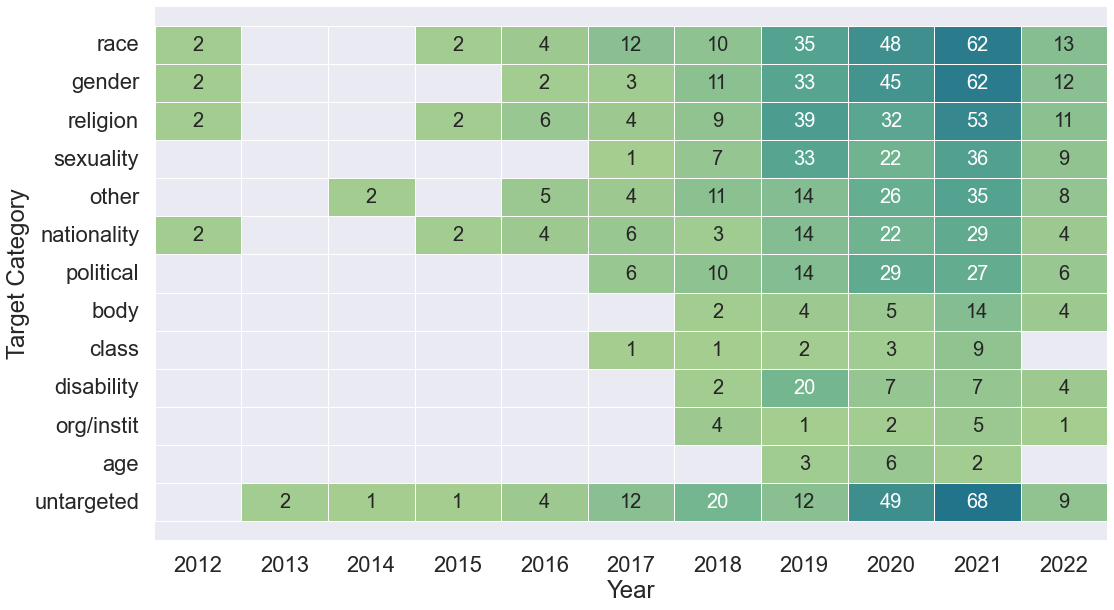

In [462]:
fig, ax = plt.subplots(figsize=(16, 9))
ax = sns.heatmap(time_target_df.replace(0, np.nan),
                 linewidth=.5, # vmin=-20, 
                 vmax=110, fmt='.0f',
                 annot = True, annot_kws={"fontsize":20},
                 cmap = 'crest', cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_ylabel('Target Category')
ax.set_xlabel('Year')
plt.tight_layout()
plt.savefig('target_year_heatmap_%s_dataset.pdf' %target_level, dpi = 400)

In [463]:
time_target_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
race,2.0,0.0,0.0,2.0,4.0,12.0,10.0,35.0,48.0,62.0,13.0
gender,2.0,0.0,0.0,0.0,2.0,3.0,11.0,33.0,45.0,62.0,12.0
religion,2.0,0.0,0.0,2.0,6.0,4.0,9.0,39.0,32.0,53.0,11.0
sexuality,0.0,0.0,0.0,0.0,0.0,1.0,7.0,33.0,22.0,36.0,9.0
other,0.0,0.0,2.0,0.0,5.0,4.0,11.0,14.0,26.0,35.0,8.0
nationality,2.0,0.0,0.0,2.0,4.0,6.0,3.0,14.0,22.0,29.0,4.0
political,0.0,0.0,0.0,0.0,0.0,6.0,10.0,14.0,29.0,27.0,6.0
body,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,14.0,4.0
class,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,9.0,0.0
disability,0.0,0.0,0.0,0.0,0.0,0.0,2.0,20.0,7.0,7.0,4.0


In [464]:
time_target_df_norm = time_target_df.div(time_target_df.sum(axis = 0), axis=1).sort_values(['2012'],
                                                                                           ascending = False)
time_target_df_norm

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
race,0.25,0.0,0.000000,0.285714,0.16,0.244898,0.111111,0.156250,0.162162,0.151589,0.160494
gender,0.25,0.0,0.000000,0.000000,0.08,0.061224,0.122222,0.147321,0.152027,0.151589,0.148148
religion,0.25,0.0,0.000000,0.285714,0.24,0.081633,0.100000,0.174107,0.108108,0.129584,0.135802
nationality,0.25,0.0,0.000000,0.285714,0.16,0.122449,0.033333,0.062500,0.074324,0.070905,0.049383
sexuality,0.00,0.0,0.000000,0.000000,0.00,0.020408,0.077778,0.147321,0.074324,0.088020,0.111111
other,0.00,0.0,0.666667,0.000000,0.20,0.081633,0.122222,0.062500,0.087838,0.085575,0.098765
political,0.00,0.0,0.000000,0.000000,0.00,0.122449,0.111111,0.062500,0.097973,0.066015,0.074074
body,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.022222,0.017857,0.016892,0.034230,0.049383
class,0.00,0.0,0.000000,0.000000,0.00,0.020408,0.011111,0.008929,0.010135,0.022005,0.000000
disability,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.022222,0.089286,0.023649,0.017115,0.049383


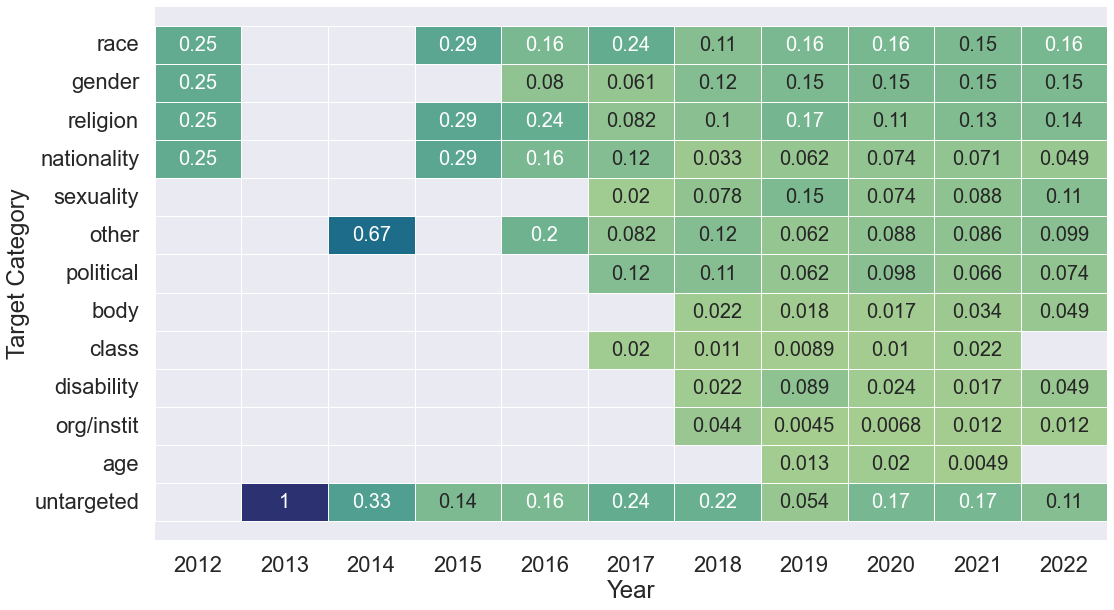

In [466]:
fig, ax = plt.subplots(figsize=(16, 9))
ax = sns.heatmap(time_target_df_norm.replace(0, np.nan),
                 linewidth=.5, # vmin=-20, 
                 #fmt='.0f',
                 annot = True, annot_kws={"fontsize":20},
                 cmap = 'crest', cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_ylabel('Target Category')
ax.set_xlabel('Year')
plt.tight_layout()
plt.savefig('target_year_heatmap_norm_%s_dataset.pdf' %target_level, dpi = 400)

In [467]:
time_language_df_.columns

Index(['Language', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', 'Language ID'],
      dtype='object')

### Country-wise contributions over time

In [469]:
country_time_dict = {}

for country in country_list:
    country_time_dict[country] = []


for _, row in data.iterrows():
    for country in country_list:
        # print(row['Researcher location'].split(', '))
        if country in row['Researcher location'].split(', '):
            # country_time_dict[country].extend(row['Publication period'].split(', '))
            # converting from paper-level to dataset-level
            country_time_dict[country].extend(row['Publication period'].split(', ') * int(row['Number of new datasets']))
            
for country in country_time_dict:
    country_time_dict[country] = dict(Counter(country_time_dict[country]))
    
# pd.DataFrame(country_time_dict).T.sort_values('2020-2021', ascending = False)
pd.DataFrame(country_time_dict).T.sort_values('2021', ascending = False)

,2018,2020,2019,2021,2015,2017,2014,2016,2022,2012,2013
USA,12.0,36.0,16.0,42.0,NaN,14.0,1.0,7.0,3.0,2.0,2.0
India,4.0,12.0,6.0,22.0,NaN,1.0,NaN,3.0,9.0,NaN,NaN
UK,4.0,15.0,2.0,17.0,NaN,9.0,NaN,2.0,8.0,NaN,NaN
Italy,4.0,2.0,8.0,12.0,NaN,5.0,NaN,NaN,1.0,NaN,NaN
Bangladesh,1.0,1.0,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Japan,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ireland,2.0,6.0,NaN,NaN,1.0,2.0,NaN,NaN,2.0,NaN,NaN
Malta,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyprus,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [470]:
top_countries = list(countries_df.reset_index().head()['Researcher location'].values)
top_countries

['USA', 'India', 'UK', 'Germany', 'Italy']

In [471]:
country_time_df = pd.DataFrame(country_time_dict).T.rename_axis('Researcher Location').reset_index()#.set_index('Researcher Location')
# country_time_df = country_time_df[country_time_df['']]
country_time_df

,Researcher Location,2018,2020,2019,2021,2015,2017,2014,2016,2022,2012,2013
0,Colombia,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iraq,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sri Lanka,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nepal,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,China,NaN,5.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
56,Cyprus,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
57,Belgium,NaN,2.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
58,USA,12.0,36.0,16.0,42.0,NaN,14.0,1.0,7.0,3.0,2.0,2.0
59,Finland,2.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:
other_countries_df = country_time_df[~country_time_df['Researcher Location'].isin(top_countries)]
other_countries_df = pd.DataFrame(other_countries_df.sum())
other_countries_df = other_countries_df.T
other_countries_df.at[0,'Researcher Location'] = 'All other'
other_countries_df

,Researcher Location,2018,2020,2019,2021,2015,2017,2014,2016,2022,2012,2013
0,All other,31.0,87.0,50.0,116.0,3.0,18.0,2.0,4.0,24.0,0.0,0.0


In [473]:
country_time_df = country_time_df[country_time_df['Researcher Location'].isin(top_countries)]
country_time_df = pd.concat([country_time_df, other_countries_df])
# country_time_df = country_time_df[['Researcher Location', '2012-2013', '2014-2015', '2016-2017',
#                                    '2018-2019', '2020-2021', '2022']]
country_time_df = country_time_df[['Researcher Location', '2012', '2013', '2014', '2015', '2016', '2017',
                                   '2018', '2019', '2020', '2021', '2022']]

In [474]:
# add a bar for all other countries
# country_time_df.sort_values('2020-2021', ascending = False)
country_time_df.sort_values('2021', ascending = False)

,Researcher Location,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,All other,0.0,0.0,2.0,3.0,4.0,18.0,31.0,50.0,87.0,116.0,24.0
58,USA,2.0,2.0,1.0,NaN,7.0,14.0,12.0,16.0,36.0,42.0,3.0
13,India,NaN,NaN,NaN,NaN,3.0,1.0,4.0,6.0,12.0,22.0,9.0
11,UK,NaN,NaN,NaN,NaN,2.0,9.0,4.0,2.0,15.0,17.0,8.0
31,Italy,NaN,NaN,NaN,NaN,NaN,5.0,4.0,8.0,2.0,12.0,1.0
21,Germany,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,18.0,9.0,NaN


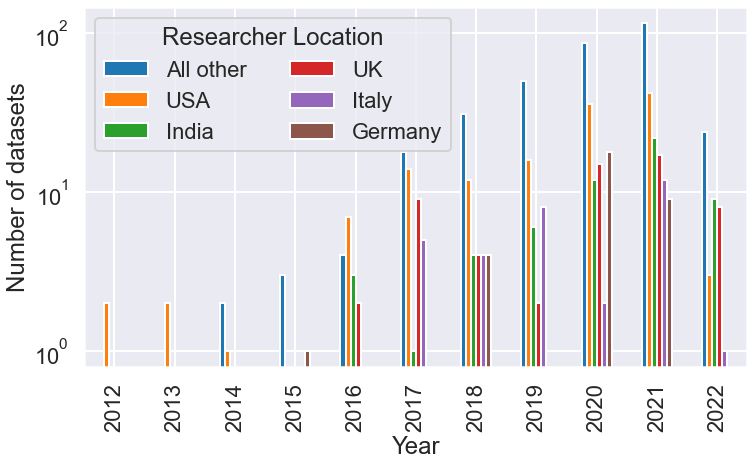

In [477]:
fig, ax = plt.subplots(figsize = (11, 7))
# plot_df = country_time_df.sort_values('2020-2021', ascending = False).set_index('Researcher Location').T
plot_df = country_time_df.sort_values('2021', ascending = False).set_index('Researcher Location').T
plot_df.plot(kind = 'bar', ax = ax, color = sns.color_palette()
             #color = ['grey', 'red', 'orange', 'pink', 'green', 'blue']
            )
ax.set_yscale('log')
ax.set_ylabel('Number of datasets')
ax.set_xlabel('Year')
plt.legend(title = 'Researcher Location', loc="upper left", ncol=2)
plt.tight_layout()

In [478]:
country_time_df

,Researcher Location,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
11,UK,NaN,NaN,NaN,NaN,2.0,9.0,4.0,2.0,15.0,17.0,8.0
13,India,NaN,NaN,NaN,NaN,3.0,1.0,4.0,6.0,12.0,22.0,9.0
21,Germany,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,18.0,9.0,NaN
31,Italy,NaN,NaN,NaN,NaN,NaN,5.0,4.0,8.0,2.0,12.0,1.0
58,USA,2.0,2.0,1.0,NaN,7.0,14.0,12.0,16.0,36.0,42.0,3.0
0,All other,0.0,0.0,2.0,3.0,4.0,18.0,31.0,50.0,87.0,116.0,24.0


In [479]:
# country_time_df['Researcher Location'] = ['IN', 'USA', 'UK', 'IT', 'DE', 'Other']
di = {'India': 'IN', 'USA': 'USA',
      'UK': 'UK', 'Italy': 'IT',
      'Germany': 'DE', 'All other': 'Other'}
country_time_df = country_time_df.replace({"Researcher Location": di})

/var/folders/5r/7t2d12d16c9dtlzjzc9p6xjr0000gn/T/ipykernel_64308/1662845873.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  bar = plot_df.plot(kind = 'bar', ax = ax, width=0.8, cmap = cm_, color = sns.color_palette())
/var/folders/5r/7t2d12d16c9dtlzjzc9p6xjr0000gn/T/ipykernel_64308/1662845873.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  bar = plot_df.plot(kind = 'bar', ax = ax, width=0.8, cmap = cm_, color = sns.color_palette())


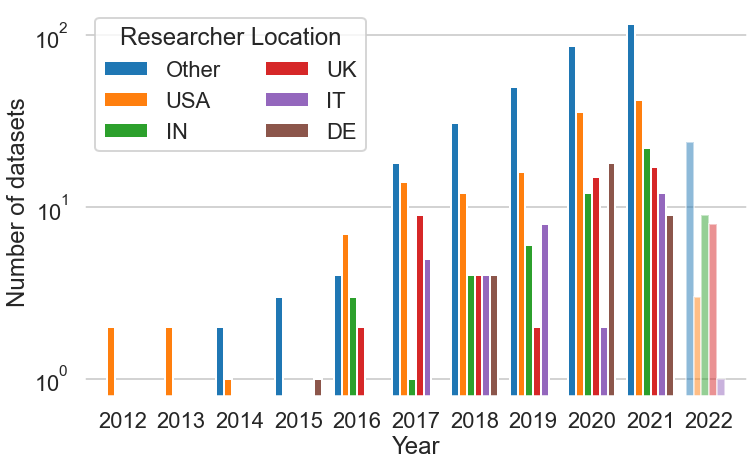

In [706]:
fig, ax = plt.subplots(figsize = (11, 7))
# plot_df = country_time_df.sort_values('2020-2021', ascending = False).set_index('Researcher Location').T
plot_df = country_time_df.sort_values('2021', ascending = False).set_index('Researcher Location').T
bar = plot_df.plot(kind = 'bar', ax = ax, width=0.8, cmap = cm_, color = sns.color_palette())
ax.set_yscale('log')
ax.set_ylabel('Number of datasets')
ax.set_xlabel('Year')
#bar.legend(title="Researcher Location", facecolor="white")
bar.get_children()[10].set_alpha(0.5)
bar.get_children()[21].set_alpha(0.5)
bar.get_children()[32].set_alpha(0.5)
bar.get_children()[43].set_alpha(0.5)
bar.get_children()[54].set_alpha(0.5)

plt.legend(title = 'Researcher Location', loc="upper left", ncol=2, facecolor="white")
bar.set(axisbelow=True)
plt.xticks(rotation=0, ha='center')
ax.set_facecolor("white")
bar.grid(axis='y', color="lightgrey")

plt.tight_layout()
plt.savefig('countries_over_time_other_countries_log_dataset.pdf', dpi = 400)


In [483]:
all_languages = [i[0] for i in languages_df.reset_index('Language').values]
all_languages

['English',
 'Arabic',
 'Spanish',
 'Russian',
 'Bengali',
 'French',
 'German',
 'Hindi-English',
 'Turkish',
 'Indonesian',
 'Urdu',
 'Portuguese',
 'Italian',
 'Chinese',
 'Greek',
 'Dutch',
 'Albanian',
 'Croatian',
 'Kannada-English',
 'Hindi',
 'Tamil-English',
 'Korean',
 'Tunisian',
 'Malayalam-English',
 'Vietnamese',
 'Finnish',
 'Kazakh',
 'Danish',
 'Nepali',
 'Sinhala',
 'Malay',
 'Swedish',
 'Afaan Oromoo',
 'Bulgarian',
 'Marathi',
 'Odia',
 'Japanese',
 'Maltese',
 'Maltenglish',
 'Amharic']

In [484]:
# taking into account multiple languages

time_language_dict = {}
for lang in all_languages:
    time_language_dict[lang] = {}
    for time_bucket in buckets:
        time_language_dict[lang][time_bucket] = 0
        
    for _, row in data.iterrows():
        if lang in row['Language'].split(', '):
            # time_language_dict[lang][row['Publication period']] += 1
            # converting from paper-level to dataset-level
            time_language_dict[lang][row['Publication period']] += row['Number of new datasets']

In [485]:
time_language_df = pd.DataFrame(time_language_dict).T.rename_axis('Language').reset_index().set_index('Language').reset_index()

In [486]:
time_language_df_top = time_language_df[time_language_df['Language'].isin(top_languages[:5])]
time_language_df_top

,Language,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,English,2.0,2.0,3.0,3.0,10.0,24.0,32.0,40.0,79.0,88.0,15.0
1,Arabic,0.0,0.0,0.0,0.0,0.0,3.0,5.0,4.0,7.0,15.0,3.0
2,Spanish,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,10.0,11.0,0.0
3,Russian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,9.0,9.0,1.0
4,Bengali,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,14.0,0.0


In [487]:
time_language_other_df = time_language_df[~time_language_df['Language'].isin(top_languages[:5])]
other_countries_df = pd.DataFrame(time_language_other_df.sum())
other_countries_df = other_countries_df.T
other_countries_df.at[0,'Language'] = 'All other'
other_countries_df

,Language,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,All other,0.0,0.0,0.0,0.0,3.0,17.0,12.0,22.0,76.0,41.0,18.0


In [488]:
time_language_df_top = pd.concat([time_language_df_top, other_countries_df])
# time_language_df_top = time_language_df_top[['Language', '2012-2013', '2014-2015', '2016-2017',
#                                    '2018-2019', '2020-2021', '2022']]
time_language_df_top = time_language_df_top[['Language', '2012', '2013', '2014', '2015', '2016', '2017',
                                   '2018', '2019', '2020', '2021', '2022']]

In [489]:
time_language_df_top

,Language,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,English,2.0,2.0,3.0,3.0,10.0,24.0,32.0,40.0,79.0,88.0,15.0
1,Arabic,0.0,0.0,0.0,0.0,0.0,3.0,5.0,4.0,7.0,15.0,3.0
2,Spanish,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,10.0,11.0,0.0
3,Russian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,9.0,9.0,1.0
4,Bengali,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,14.0,0.0
0,All other,0.0,0.0,0.0,0.0,3.0,17.0,12.0,22.0,76.0,41.0,18.0


/var/folders/5r/7t2d12d16c9dtlzjzc9p6xjr0000gn/T/ipykernel_64308/3192435902.py:2: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  baa=time_language_df_top.set_index('Language').sort_values('2021', ascending = False).T.plot(kind = 'bar', width=0.8, ax = ax,
/var/folders/5r/7t2d12d16c9dtlzjzc9p6xjr0000gn/T/ipykernel_64308/3192435902.py:2: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  baa=time_language_df_top.set_index('Language').sort_values('2021', ascending = False).T.plot(kind = 'bar', width=0.8, ax = ax,


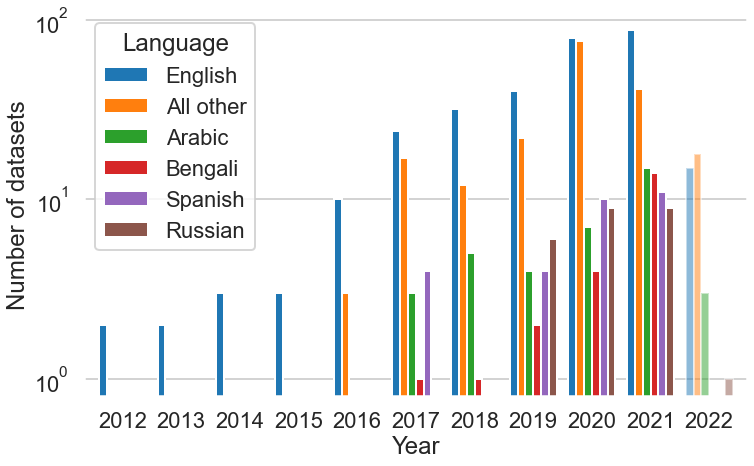

In [707]:
fig, ax = plt.subplots(figsize=(11, 7))
baa=time_language_df_top.set_index('Language').sort_values('2021', ascending = False).T.plot(kind = 'bar', width=0.8, ax = ax, 
                                                                                         cmap = cm_,
                                                  # color = ['red', 'orange', 'magenta', 'green', 'blue', 'grey']
                                                 color = sns.color_palette())
ax.set_yscale('log')
ax.set_ylabel('Number of datasets')
ax.set_xlabel('Year')
baa.legend(title="Language", facecolor="white")

baa.get_children()[10].set_alpha(0.5)
baa.get_children()[21].set_alpha(0.5)
baa.get_children()[32].set_alpha(0.5)
baa.get_children()[65].set_alpha(0.5)

ax.set_facecolor("white")
baa.grid(axis='y', color="lightgrey")
baa.set(axisbelow=True)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('language_over_time_other_languages_dataset.pdf', dpi = 400)

### Topical Focus and Targets

In [493]:
data['Targeted (conceptual)'] = ['yes' if type(i) == str else 'no' for i in data_prev['Conceptualization']]
data['Targeted (reported)'] = ['yes' if type(i) == str else 'no' for i in data_prev['Reported']]
data.groupby('Targeted (conceptual)').size()

Targeted (conceptual)
no     173
yes    168
dtype: int64

In [494]:
data.groupby('Targeted (reported)').size()

Targeted (reported)
no     184
yes    157
dtype: int64

In [495]:
topical_data = data.copy()
topical_data['topical focus'] = [i.lower() for i in topical_data['topical focus']]
top_foci = topical_data['topical focus'].str.split(', ').explode().value_counts().head(20).keys()
topical_data['topical focus'].str.split(', ').explode().value_counts().head(20)

topical focus
hate speech          97
cyberbullying        40
abusiveness          40
offensiveness        39
toxicity             27
sexism               10
misogyny              7
racism                7
aggressiveness        7
extremism             5
harassment            4
threats               3
abusive language      3
trolling              3
sentiment             3
bullying              2
gender bias           2
sexual harassment     2
social bias           2
islamophobia          2
Name: count, dtype: int64

In [496]:
# top_foci = topical_data.groupby('topical focus').size().sort_values(ascending = False).head(20).keys()
focus_target_dict_conceptual = {'yes' : {}, 'no' : {}}
focus_target_dict_reported = {'yes' : {}, 'no' : {}}

for focus in top_foci:
    topical_data_targeted_conceptual = topical_data[topical_data['Targeted (conceptual)'] == 'yes']
    topical_data_untargeted_conceptual = topical_data[topical_data['Targeted (conceptual)'] == 'no']
    
    topical_data_targeted_reported = topical_data[topical_data['Targeted (reported)'] == 'yes']
    topical_data_untargeted_reported = topical_data[topical_data['Targeted (reported)'] == 'no']
    
    focus_target_dict_conceptual['yes'][focus] = 0
    focus_target_dict_conceptual['no'][focus] = 0
    
    focus_target_dict_reported['yes'][focus] = 0
    focus_target_dict_reported['no'][focus] = 0
    
    for _, row in topical_data_targeted_conceptual.iterrows():
        if focus in row['topical focus'].split(', '):
            # focus_target_dict_conceptual['yes'][focus] += 1
            focus_target_dict_conceptual['yes'][focus] += row['Number of new datasets']
            
    for _, row in topical_data_untargeted_conceptual.iterrows():
        if focus in row['topical focus'].split(', '):
            # focus_target_dict_conceptual['no'][focus] += 1
            focus_target_dict_conceptual['no'][focus] += row['Number of new datasets']
            
    for _, row in topical_data_targeted_reported.iterrows():
        if focus in row['topical focus'].split(', '):
            # focus_target_dict_reported['yes'][focus] += 1
            focus_target_dict_reported['yes'][focus] += row['Number of new datasets']
            
    for _, row in topical_data_untargeted_reported.iterrows():
        if focus in row['topical focus'].split(', '):
            # focus_target_dict_reported['no'][focus] += 1
            focus_target_dict_reported['no'][focus] += row['Number of new datasets']

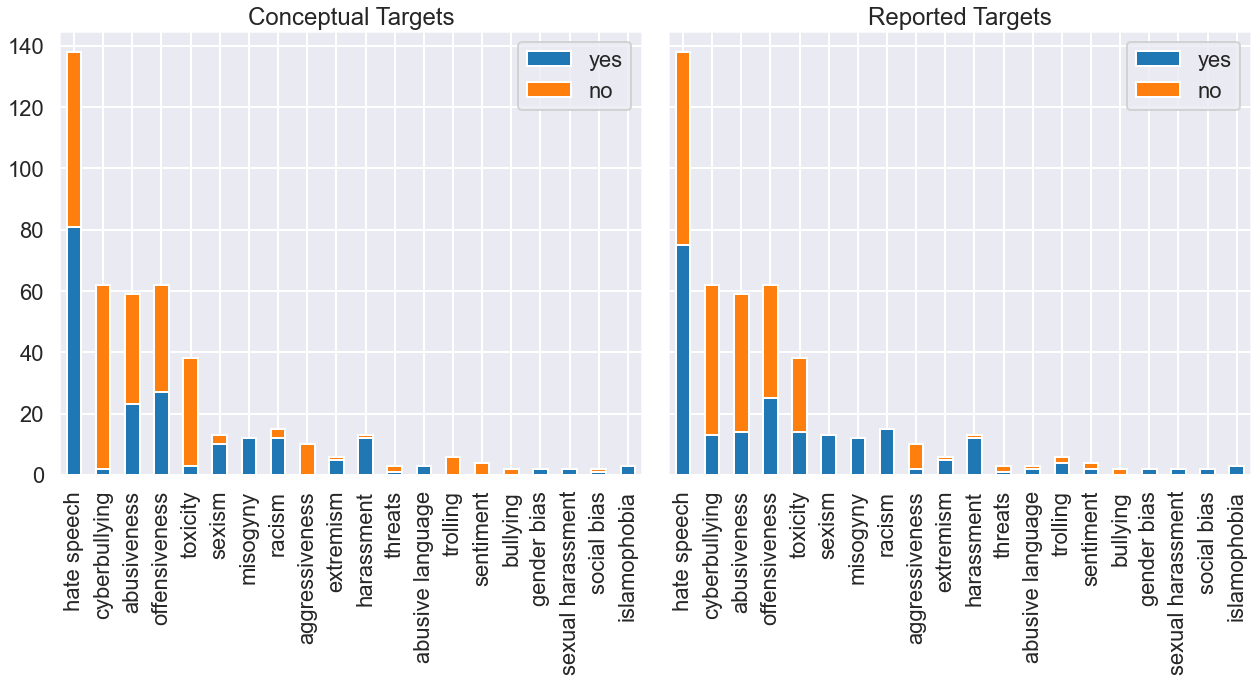

In [497]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 10), sharey = True)
pd.DataFrame(focus_target_dict_reported).plot(kind = 'bar', stacked = True, ax = ax[1])
pd.DataFrame(focus_target_dict_conceptual).plot(kind = 'bar', stacked = True, ax = ax[0])

ax[1].set_title('Reported Targets')
ax[0].set_title('Conceptual Targets')

plt.tight_layout()
# plt.savefig('../results/datasets_by_topical_focus.pdf')

In [498]:
data_sample = data[data['topical focus'] == 'Sexism']
data_sample[data_sample['Targeted (reported)'] == 'no']['Title of the paper'].values#[['Identity-directed', 'Identity-directed_summary']]#['topical focus'].values

array([], dtype=object)

In [499]:
data_sample = data[data['topical focus'].str.contains('Sexism', regex=True)]
data_sample[data_sample['Targeted (conceptual)'] == 'no'][['Title of the paper', 'topical focus', 'Conceptualization', 'Reported']].values#[['Identity-directed', 'Identity-directed_summary']]#['topical focus'].values

array([['A New Measure of Polarization in the Annotation of Hate Speech',
        'Hate Speech, Sexism, Racism, Homophobia, Polarization', nan,
        'race, gender, sexuality']], dtype=object)

In [500]:
data_prev[data_prev['Title of the paper'] == 'Multimodal Classification of Sexist Advertisements']

,Unnamed: 0,id,repeat check,reference,Title of the paper,Journal,Researcher location,Summary of the Paper,reaffirm,citations,...,Identity-directed_summary,Affiliation-directed,Affiliation-directed_1_TEXT,Person-directed,Person-directed_1_TEXT,about or to a person,counter speech,Content producer,Conceptualization or Reported,Conceptualization and Reported
270,270,390.0,No,"(Gasparini et al., 2018)",Multimodal Classification of Sexist Advertisements,International Joint Conference on e-Business and Telecommunications,Italy,"In this paper the authors give a first insight in the field of automatic detection of sexist multimedia contents, by proposing both a unimodal and a multimodal approach. In the unimodal approach they propose binary classifiers based on different visual features to automatically detect sexist visual content. In the multimodal approach both visual and textual features are considered. They created a manually labeled database of sexist and non sexist advertisements, composed of two main datasets: a first one containing 423 advertisements with images that have been considered sexist (or non sexist) with respect to their visual content, and a second dataset comprising 192 advertisements labeled as sexist and non sexist according to visual and/or textual cues. They adopted the first dataset to train a visual classifier. Finally they proved that a multimodal approach that considers the trained visual classifier and a textual one permits good classification performance on the second dataset, reaching 87% of recall and 75% of accuracy, which are significantly higher than the performance obtained by each of the corresponding unimodal approaches.",Yes,8.0,...,NaN,Yes,Misogyny,No,NaN,NaN,No,Human,gender,gender


### Multilinguality vs monolinguality

In [501]:
data['# Languages'] = [len(row['Language'].split(', ')) for _, row in data.iterrows()]
data.groupby('# Languages').size()

# Languages
1     315
2      15
3       5
4       1
5       3
6       1
10      1
dtype: int64

In [502]:
date_languages_df = {}
dates = data['Publication period'].unique()
dates.sort()
for date in dates:
    date_languages_df[date] = {}
    for i in range(1, 2):
        date_languages_df[date][i] = 0
    date_languages_df[date]['2+'] = 0
    data_sample = data[data['Publication period'] == date]
    for _, row in data_sample.iterrows():
        if row['# Languages'] > 1:
            # date_languages_df[date]['2+'] += 1
            date_languages_df[date]['2+'] += row['Number of new datasets']
        else:
            # date_languages_df[date][row['# Languages']] += 1
            date_languages_df[date][row['# Languages']] += row['Number of new datasets']

In [533]:
data__ = pd.DataFrame(date_languages_df).rename_axis('# Languages').T
data__


# Languages,1,2+
2012,2.0,0.0
2013,2.0,0.0
2014,3.0,0.0
2015,3.0,0.0
2016,13.0,0.0
2017,23.0,5.0
2018,46.0,2.0
2019,62.0,7.0
2020,103.0,23.0
2021,155.0,10.0


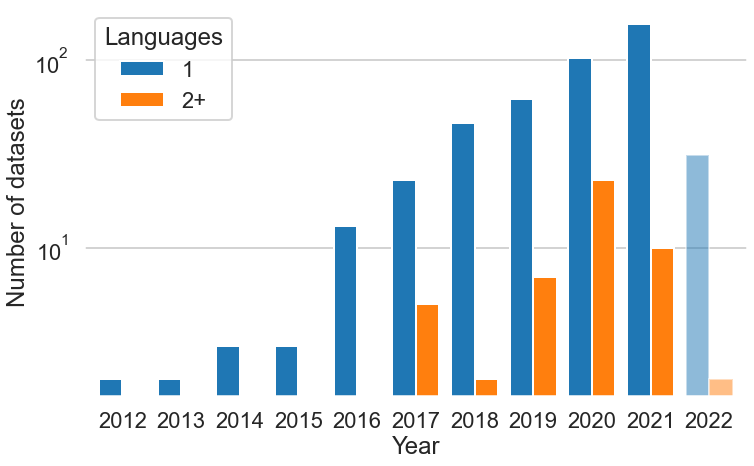

In [609]:
fig, ax = plt.subplots(figsize = (11, 7))
bap = pd.DataFrame(data__).plot(kind = 'bar', ax=ax, width = 0.8, color = sns.color_palette())#color = [colors[0], colors[-1]])
#ax.set_yscale('log')
bap.legend(title="Languages", facecolor="white")
bap.get_children()[10].set_alpha(0.5)
bap.get_children()[21].set_alpha(0.5)
plt.xticks(rotation=0, ha='center')
ax.set_facecolor("white")

#ax.bar(x, edgecolor='black')
plt.yscale('log')
plt.ylabel('Number of datasets')
plt.xlabel('Year')
bap.grid(axis='y', color="lightgrey")
bap.set(axisbelow=True)
plt.tight_layout()
plt.savefig('multilinguality_over_time_dataset.pdf', dpi = 400)

In [547]:
pd.DataFrame(date_languages_df).sum(axis = 1)

1     443.0
2+     49.0
dtype: float64

### Multitarget vs monotarget

In [682]:
# data['# Reported Targets'] = [len(row['Reported'].split(', ')) if type(row['Reported']) == str else 0 for _,
#                               row in data_prev.iterrows()]
# data['# Conceptual Targets'] = [len(row['Conceptualization'].split(', ')) if type(row['Conceptualization']) == str else 0 for _,
#                                 row in data_prev.iterrows()]
# data['# Any Targets'] = [len(row['Conceptualization or Reported'].split(', ')) if type(row['Conceptualization or Reported']) == str else 0 for _,
#                                 row in data_prev.iterrows()]

data['# Reported Targets'] = [len(set(row['Reported'].split(', ') * int(row['Number of new datasets']))) if type(row['Reported']) == str else 0 for _,
                              row in data_prev.iterrows()]
data['# Conceptual Targets'] = [len(set(row['Conceptualization'].split(', ') * int(row['Number of new datasets']))) if type(row['Conceptualization']) == str else 0 for _,
                                row in data_prev.iterrows()]
data['# Any Targets'] = [len(set(row['Conceptualization or Reported'].split(', ') * int(row['Number of new datasets']))) if type(row['Conceptualization or Reported']) == str else 0 for _,
                                row in data_prev.iterrows()]


data.groupby('# Reported Targets').size()

# Reported Targets
0     184
1      84
2      18
3      19
4      17
5       4
6       7
7       3
8       2
9       2
10      1
dtype: int64

In [683]:
data.groupby('# Conceptual Targets').size()

# Conceptual Targets
0     173
1      63
2      23
3      15
4      23
5      17
6      19
7       4
8       2
9       1
13      1
dtype: int64

/Users/zehuiyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

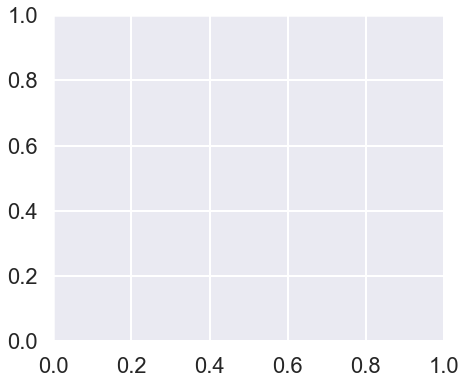

In [684]:
fig, ax = plt.subplots(figsize = (7, 6))
ax = sns.histplot(data['# Conceptual Targets'], color = colors[0], binwidth=1, alpha = 0.5, label = 'Conceptual Targets')
ax = sns.histplot(data['# Reported Targets'], binwidth=1, color = colors[-1], alpha = 0.6, label = 'Reported Targets')
ax.set_yscale('log')
ax.set_ylabel('# Datasets')
ax.set_xlabel('Targets')
ax.set_title('jjjjj', color = 'white')
plt.legend()
plt.tight_layout()

# plt.savefig('../results/conceptual_vs_reported.pdf', dpi = 400)

In [686]:
date_languages_df_reported = {}
date_languages_df_conceptual = {}
date_languages_df_any = {}

dates = data['Publication period'].unique()
dates.sort()
for date in dates:
    date_languages_df_reported[date] = []
    date_languages_df_conceptual[date] = []
    date_languages_df_any[date] = []
    
    data_sample = data[data['Publication period'] == date]
    for _, row in data_sample.iterrows():
        date_languages_df_reported[date].append(row['# Reported Targets'])
        date_languages_df_conceptual[date].append(row['# Conceptual Targets'])
        date_languages_df_any[date].append(row['# Any Targets'])
#     for _, row in data_sample.iterrows():
#         if row['# Reported Targets'] > 2:
#             date_languages_df[date]['3+'] += 1
#         else:
#             date_languages_df[date][row['# Reported Targets']] += 1

In [687]:
date_languages_df_conceptual

{'2012': [0],
 '2013': [0, 0],
 '2014': [0, 0],
 '2015': [0, 0],
 '2016': [0, 0, 1, 1, 0, 0, 1, 4],
 '2017': [0, 3, 0, 0, 0, 0, 3, 1, 2, 3, 0, 0, 0, 1, 1, 0],
 '2018': [0,
  0,
  0,
  0,
  5,
  0,
  0,
  1,
  0,
  0,
  5,
  2,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  5,
  0,
  1,
  0,
  0,
  6,
  4,
  0,
  1,
  0,
  0,
  0,
  0,
  4,
  0,
  2,
  0],
 '2019': [2,
  6,
  0,
  7,
  1,
  1,
  7,
  2,
  1,
  0,
  6,
  1,
  1,
  5,
  4,
  0,
  2,
  0,
  1,
  6,
  0,
  5,
  0,
  3,
  6,
  0,
  1,
  0,
  1,
  0,
  0,
  6,
  0,
  0,
  6,
  2,
  1,
  6,
  5,
  5,
  1,
  6,
  2,
  0,
  0],
 '2020': [9,
  0,
  0,
  0,
  4,
  0,
  2,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  3,
  8,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  4,
  13,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  4,
  1,
  0,
  2,
  5,
  6,
  4,
  1,
  0,
  3,
  3,
  1,
  0,
  2,
  1,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  6,
  0,
  2,
  0,
  0,
  3,
  4,
  0,
  0,
  0,
  0,
  4,
  4,
  1,
  1,
  2,
  0,
  0,
  3,
  1,

In [688]:
date_languages_df_hist_reported = {}
date_languages_df_hist_conceptual = {}
date_languages_df_hist_any = {}

# bins=[0,1,5,9,13]
bins=[0,1,2,5,8,20]

for date in dates:
    date_languages_df_hist_reported[date], _ = np.histogram(date_languages_df_reported[date], bins=bins)
    date_languages_df_hist_conceptual[date], _ = np.histogram(date_languages_df_conceptual[date], bins=bins)
    date_languages_df_hist_any[date], _ = np.histogram(date_languages_df_any[date], bins=bins)

In [689]:
date_languages_df_hist_conceptual

{'2012': array([1, 0, 0, 0, 0]),
 '2013': array([2, 0, 0, 0, 0]),
 '2014': array([2, 0, 0, 0, 0]),
 '2015': array([2, 0, 0, 0, 0]),
 '2016': array([4, 3, 1, 0, 0]),
 '2017': array([9, 3, 4, 0, 0]),
 '2018': array([21,  7,  4,  4,  0]),
 '2019': array([14, 10,  7, 14,  0]),
 '2020': array([47, 15, 21,  6,  3]),
 '2021': array([59, 21, 19, 13,  1]),
 '2022': array([12,  4,  5,  3,  0])}

In [690]:
date_languages_df_hist_reported

{'2012': array([0, 0, 1, 0, 0]),
 '2013': array([2, 0, 0, 0, 0]),
 '2014': array([1, 1, 0, 0, 0]),
 '2015': array([1, 0, 1, 0, 0]),
 '2016': array([2, 4, 2, 0, 0]),
 '2017': array([11,  3,  1,  1,  0]),
 '2018': array([22, 10,  3,  1,  0]),
 '2019': array([24,  8,  9,  3,  1]),
 '2020': array([52, 22, 14,  2,  2]),
 '2021': array([57, 26, 21,  7,  2]),
 '2022': array([12, 10,  2,  0,  0])}

In [691]:
date_languages_df_hist_any

{'2012': array([0, 0, 1, 0, 0]),
 '2013': array([2, 0, 0, 0, 0]),
 '2014': array([1, 1, 0, 0, 0]),
 '2015': array([1, 0, 1, 0, 0]),
 '2016': array([2, 4, 2, 0, 0]),
 '2017': array([8, 3, 4, 1, 0]),
 '2018': array([15,  9,  7,  5,  0]),
 '2019': array([ 9,  9, 10, 15,  2]),
 '2020': array([34, 21, 24,  8,  5]),
 '2021': array([41, 22, 29, 18,  3]),
 '2022': array([8, 7, 5, 4, 0])}

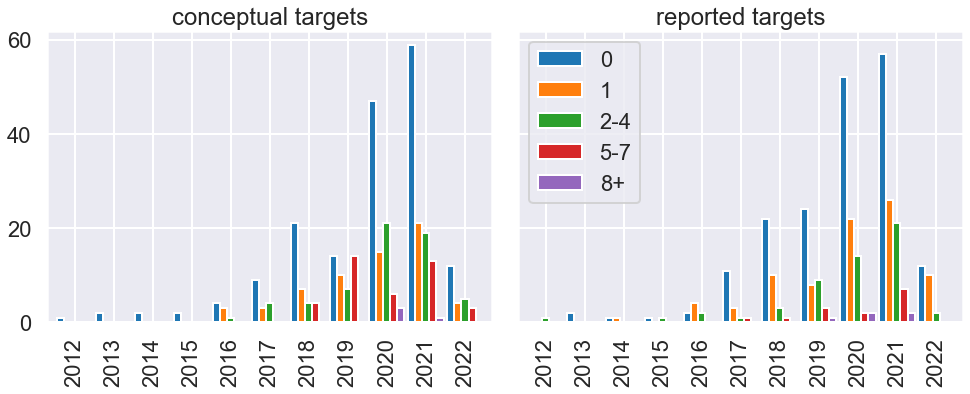

In [692]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (14, 6))

df_reported = pd.DataFrame(date_languages_df_hist_reported).T
df_conceptual = pd.DataFrame(date_languages_df_hist_conceptual).T
df_any = pd.DataFrame(date_languages_df_hist_any).T

# df_reported.columns = ['0', '1-4', '5-8', '9-12']
# df_conceptual.columns = ['0', '1-4', '5-8', '9-12']

df_reported.columns = ['0', '1', '2-4', '5-7', '8+']
df_conceptual.columns = ['0', '1', '2-4', '5-7', '8+']
df_any.columns = ['0', '1', '2-4', '5-7', '8+']


df_conceptual.plot(kind = 'bar', ax = ax[0], width=0.9, legend = '')
df_reported.plot(kind = 'bar', ax = ax[1], width=0.9)

ax[0].set_title('conceptual targets')
ax[1].set_title('reported targets')

plt.tight_layout()

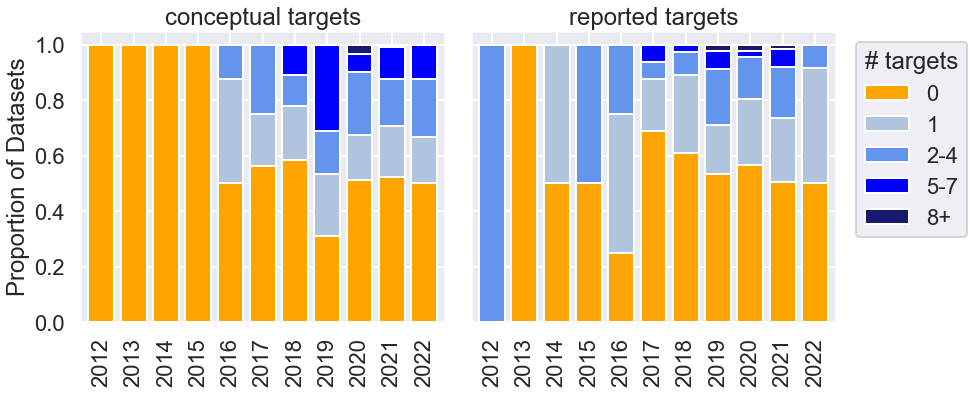

In [694]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (14, 6))

df_conceptual.div(df_conceptual.sum(axis = 1), axis = 0).plot(kind = 'bar', stacked = True, ax = ax[0],
                                                              legend = '', width=0.8, color = ['orange', 'lightsteelblue',
                                                                                               'cornflowerblue',
                                                                    'blue', 'midnightblue'])
df_reported.div(df_reported.sum(axis = 1), axis = 0).plot(kind = 'bar', stacked =  True, ax = ax[1],
                                                          label = 'reported targets', width=0.8, 
                                                          color = ['orange', 'lightsteelblue', 'cornflowerblue',
                                                                    'blue', 'midnightblue']
                                                          # cmap = cm_ 
                                                         )

ax[0].set_ylabel('Proportion of Datasets')
ax[0].set_title('conceptual targets')
ax[1].set_title('reported targets')
ax[1].legend(title = '# targets', bbox_to_anchor=(1.39,1), loc="upper right")
plt.tight_layout()
plt.savefig('conceptual_vs_reported_over_time_dataset.pdf', dpi = 400)

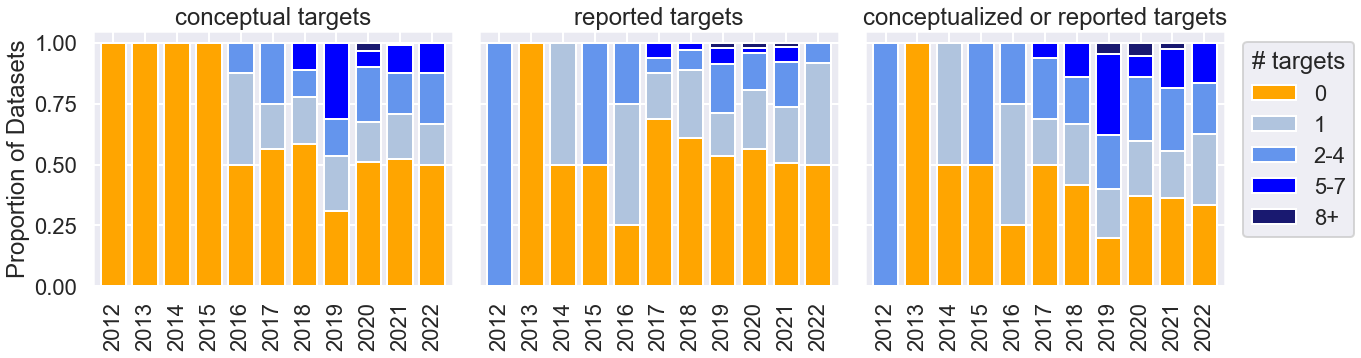

In [695]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (19, 5.5))

df_conceptual.div(df_conceptual.sum(axis = 1), axis = 0).plot(kind = 'bar', stacked = True, ax = ax[0],
                                                              legend = '', width=0.8, color = ['orange', 'lightsteelblue',
                                                                                               'cornflowerblue',
                                                                    'blue', 'midnightblue'])
df_reported.div(df_reported.sum(axis = 1), axis = 0).plot(kind = 'bar', stacked =  True, ax = ax[1],
                                                          label = 'reported targets', width=0.8, 
                                                          color = ['orange', 'lightsteelblue', 'cornflowerblue',
                                                                    'blue', 'midnightblue'], legend = '',
                                                          # cmap = cm_ 
                                                         )

df_any.div(df_any.sum(axis = 1), axis = 0).plot(kind = 'bar', stacked =  True, ax = ax[2],
                                                          label = 'reported targets', width=0.8, 
                                                          color = ['orange', 'lightsteelblue', 'cornflowerblue',
                                                                    'blue', 'midnightblue']
                                                          # cmap = cm_ 
                                                         )

ax[0].set_ylabel('Proportion of Datasets')
ax[0].set_title('conceptual targets')
ax[1].set_title('reported targets')
ax[2].set_title('conceptualized or reported targets')
ax[2].legend(title = '# targets', bbox_to_anchor=(1.39,1), loc="upper right")
plt.tight_layout()
plt.savefig('conceptual_vs_reported_vs_all_over_time_dataset.pdf', dpi = 400)

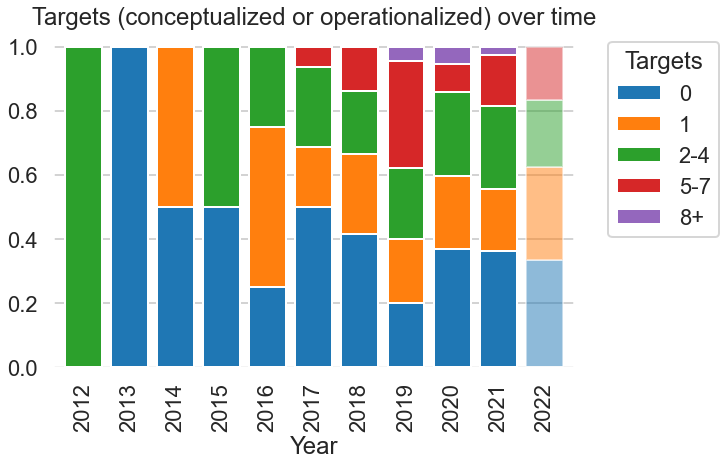

In [709]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, sharey = True, figsize = (11, 7))

bas = df_any.div(df_any.sum(axis = 1), axis = 0).plot(kind = 'bar', stacked =  True, ax = ax,
                                                          width=0.8, 
                                                          #color = ['orange', 'lightsteelblue', 'cornflowerblue',
                                                                    #'blue', 'midnightblue']
                                                      color = sns.color_palette()
                                                          # cmap = cm_ 
                                                         )

ax.set_title('Targets (conceptualized or operationalized) over time')
ax.legend(title = 'Targets', bbox_to_anchor=(1.3,1), loc="upper right", facecolor="white")
ax.set_facecolor("white")

bas.get_children()[10].set_alpha(0.5)
bas.get_children()[21].set_alpha(0.5)
bas.get_children()[32].set_alpha(0.5)
bas.get_children()[43].set_alpha(0.5)
bas.get_children()[54].set_alpha(0.5)

#plt.xticks(rotation=1, ha='center')
#plt.ylabel('Distribution of targets')
plt.xlabel('Year')
bas.grid(axis='y', color="lightgrey")
bas.set(axisbelow=True)

plt.tight_layout()
plt.savefig('all_targets_over_time_dataset.pdf', dpi = 400)


In [168]:
date_languages_df_sum_reported = {}
date_languages_df_sum_conceptual = {}
date_languages_df_sum_any = {}

for date in dates:
    date_languages_df_sum_reported[date] = sum(date_languages_df_reported[date]) / len(date_languages_df_reported[date])
    date_languages_df_sum_conceptual[date] = sum(date_languages_df_conceptual[date]) / len(date_languages_df_conceptual[date])
    date_languages_df_sum_any[date] = sum(date_languages_df_any[date]) / len(date_languages_df_any[date])

Text(0, 0.5, 'Average Number of Targets')

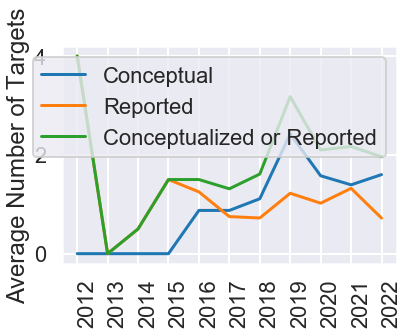

In [169]:
ax = sns.lineplot(x=date_languages_df_sum_conceptual.keys(),
                  y=date_languages_df_sum_conceptual.values(),
                  label = 'Conceptual')
ax = sns.lineplot(x=date_languages_df_sum_reported.keys(),
                  y=date_languages_df_sum_reported.values(),
                  label = 'Reported')
ax = sns.lineplot(x=date_languages_df_sum_any.keys(),
                  y=date_languages_df_sum_any.values(),
                  label = 'Conceptualized or Reported')
ax.set_xticklabels(date_languages_df_sum_reported.keys(), rotation=90, ha='right', rotation_mode='anchor')
ax.set_ylabel('Average Number of Targets')
# ax.set_title('Average Number of Targets Studied over Time')

In [170]:
data_sources = [i.lower().split(', ') if type(i) == str else [i] for i in data['Data source'].values]
data_sources = [item for sublist in data_sources for item in sublist]

In [171]:
Counter(data_sources).most_common(10)

[('twitter', 185),
 ('youtube', 42),
 ('facebook', 41),
 ('reddit', 29),
 ('wikipedia', 15),
 ('instagram', 12),
 ('gab', 9),
 ('stormfront', 5),
 ('vkontakte', 4),
 ('kaggle', 3)]

In [172]:
94 / 341

0.2756598240469208

In [173]:
data.columns

Index(['Unnamed: 0', 'id', 'repeat check', 'reference', 'Title of the paper',
       'Journal', 'Researcher location', 'Summary of the Paper', 'reaffirm',
       'citations', 'Publication date', 'Fill-in date', 'Accessibility',
       'Filter dataset', 'Construct definition', 'Sub-category',
       'Sub-category_1_TEXT', 'availability of data', 'format of dataset',
       'format of dataset_3_TEXT', 'how to access',
       'verification of the way to access', 'reference of dataset',
       'Number of datasets in use', 'Number of new datasets', 'Data source',
       'topical focus', 'Language', 'Time span of data collection',
       'data production', 'Country/ region span', 'Events',
       'Data collection procedure\n', 'anonymity of data',
       'anonymity data_1_TEXT', 'Annotated type', 'annotation schema',
       'schema', 'Sampling available', 'sampling strategy',
       'annotation number', 'train', 'test', 'Annotators', 'guideline1',
       'Guidelines', 'Incentives 1', 'Incent

In [174]:
data['Number of new datasets']

0      1
1      1
2      1
3      1
4      1
      ..
336    1
337    2
338    3
339    1
340    1
Name: Number of new datasets, Length: 341, dtype: int64

In [175]:
pd.cut(data['Number of new datasets'], 10).value_counts().sort_index()

(0.991, 1.9]    261
(1.9, 2.8]       45
(2.8, 3.7]       16
(3.7, 4.6]       11
(4.6, 5.5]        5
(5.5, 6.4]        1
(6.4, 7.3]        0
(7.3, 8.2]        1
(8.2, 9.1]        0
(9.1, 10.0]       1
Name: Number of new datasets, dtype: int64

In [176]:
data_italy = data[data['Researcher location'].str.contains('Italy')]
data_italy['Number of new datasets'].sum()

32